<a href="https://colab.research.google.com/github/Meisam-Heidari/reCLAIM-2019-Competition/blob/master/Classification_Meisam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ML Libraries
from sklearn.model_selection import train_test_split
# TF 2.0
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import naive_bayes
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# Classification DataSet

## Loading

In [0]:
#df_clas_header_test = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - test.txt")
df_clas_header_train = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - train.txt")
df_clas_header_validation = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - validation.txt")
df_clas_well_class_train = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Well_class_train.txt")
df_clas_well_class_validation = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Well_class_validate.txt")

In [0]:
#df_clas_header_test = pd.read_csv("classification/Header - test.txt")
#df_clas_header_train = pd.read_csv("classification/Header - train.txt")
#df_clas_header_validation = pd.read_csv("classification/Header - validation.txt")
#df_clas_well_class_train = pd.read_csv("classification/Well_class_train.txt")
#df_clas_well_class_validation = pd.read_csv("classification/Well_class_validate.txt")

In [0]:
#df_clas_header_test.head(2)


In [0]:
#df_clas_well_class_train.head(2)

In [0]:
#df_clas_well_class_validation.head(2)

In [0]:
#headers = []
#for i in range(len(df_clas_header_train.columns)):
#  headers.append([df_clas_header_train.columns[i],df_clas_header_validation.columns[i],df_clas_header_test.columns[i]])
#headers

## Header Test file

In [0]:
#df_clas_header_test.shape

In [0]:
#df_clas_header_test.nunique()

In [0]:
#df_clas_header_test.info()

## Header Validation File

In [0]:
#df_clas_header_validation.shape

In [0]:
#df_clas_header_validation.nunique()

In [0]:
#df_clas_header_validation.info()

## Header train File

In [0]:
#df_clas_header_train.shape

In [0]:
#df_clas_header_train.nunique()

In [0]:
#df_clas_header_train.info()

## Well class train File

In [0]:
#df_clas_well_class_train.shape

In [0]:
#df_clas_well_class_train.nunique()

In [0]:
#df_clas_well_class_train.info()

In [0]:
#df_clas_well_class_train.head()

In [0]:
#df_clas_well_class_train.describe()

## Well Class Validation File

In [0]:
#df_clas_well_class_validation.shape

In [0]:
#df_clas_well_class_validation.nunique()

In [0]:
#df_clas_well_class_validation.info()

In [0]:
#df_clas_well_class_validation.head()

In [0]:
#df_clas_well_class_validation.describe()

# Merge Data

In [27]:
df_clas_well_class_train['EPAssetsId'].duplicated().sum(), df_clas_header_train['EPAssetsId'].duplicated().sum()

(0, 0)

In [28]:
df_train = pd.merge(df_clas_well_class_train, df_clas_header_train, on = ['EPAssetsId','EPAssetsId'] )
df_validation = pd.merge(df_clas_well_class_validation, df_clas_header_validation, on = ['EPAssetsId','EPAssetsId'] )
df_train = pd.concat([df_train, df_validation], ignore_index=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 92 columns):
EPAssetsId                 720804 non-null int64
well_status                720804 non-null object
well_status_code           720804 non-null int64
Province                   720804 non-null object
LicenceNumber              720804 non-null object
UWI                        720803 non-null object
CurrentOperator            720804 non-null object
CurrentOperatorParent      720804 non-null int64
CurrentOperatorID          152031 non-null float64
Licensee                   720804 non-null object
LicenseeParentCompany      720804 non-null int64
LicenseeID                 10568 non-null float64
LicenceDate                720790 non-null object
WellType                   720804 non-null object
WellTypeStandardised       720804 non-null object
ConfidentialReleaseDate    379975 non-null object
SurfAbandonDate            185090 non-null object
WellName                   720240 non-null

In [0]:
#df_clas_well_class_validation['EPAssetsId'].duplicated().sum(), df_clas_header_validation['EPAssetsId'].duplicated().sum()

In [0]:
#df_validation = pd.merge(df_clas_well_class_validation, df_clas_header_validation, on = ['EPAssetsId','EPAssetsId'] )

In [0]:
#df_validation.info()

In [0]:
# Basic EDA


# Feature Engineering
- Correlation
- Score Gain
- ?

In [32]:
features_lst = list(df_train.columns)
len(features_lst)

92

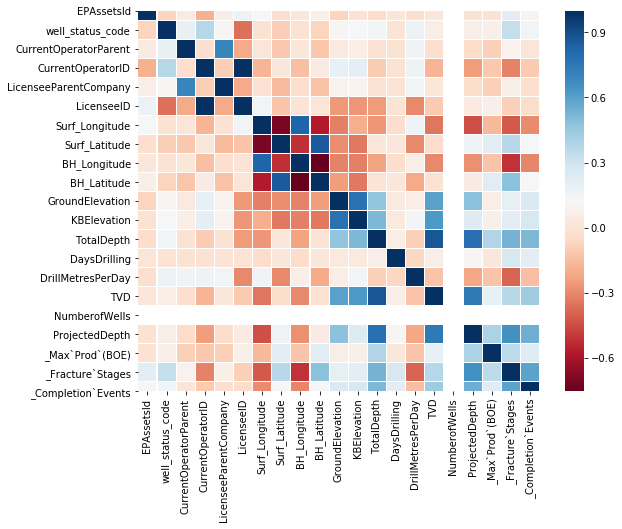

In [33]:
corr = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

In [34]:
corr[corr>0.5] 

,EPAssetsId,well_status_code,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events
EPAssetsId,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well_status_code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorParent,NaN,NaN,1.000000,NaN,0.700649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorID,NaN,NaN,NaN,1.000000,NaN,0.999511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeParentCompany,NaN,NaN,0.700649,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeID,NaN,NaN,NaN,0.999511,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.825158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,0.825158,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861734,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
corr[corr<-0.5] 

,EPAssetsId,well_status_code,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events
EPAssetsId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well_status_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorParent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeParentCompany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.706185,NaN,-0.572986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.706185,NaN,-0.517752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.517752,NaN,-0.754134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.514274,NaN
BH_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.572986,NaN,-0.754134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lets Simplify the dataset

In [0]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',92)

In [37]:
df_train[df_train['well_status']=='Abandoned'][df_train['SurveySystem']=='DLS']['SurveySystem'].nunique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1

In [38]:
df_train[df_train['OSArea']=='Cold Lake'][df_train['well_status'] =='Active'].head(50).transpose()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,1,20,46,171,398,414,445,469,470,488,589,620,636,640,641,871,991,1079,1089,1101,1147,1156,1158,1164,1281,1351,1385,1425,1553,1560,1617,1720,2035,2051,2065,2148,2213,2418,2427,2499,2542,2568,2721,2817,2829,2916,3248,3268,3285,3318
EPAssetsId,2341273,2438366,2357291,2582033,2419158,2418293,2421081,2437657,2616979,2418698,2413385,2391245,2418445,2345605,2411674,2336133,2405769,2616081,2397457,2574718,2421291,2421176,2610348,2410522,2420220,2359040,2602326,2374377,2604688,2616898,2405387,2348781,2433116,2427220,2427136,2404819,2420541,2432119,2419118,2432121,2427162,2397943,2420098,2616490,2391260,2335221,2419643,2349671,2420052,2411642
well_status,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
well_status_code,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Province,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta
LicenceNumber,0419701,0280194,0130457,0471092,0132578,0184632,0112735,0424670,0417232,0253325,0449080,0276078,0130575,0383575,0454492,0447420,0181353,0489697,0464369,0465438,0135451,0134595,0487585,0227409,0114401,0426211,0483133,0419168,0453907,0088170,0444220,0115338,0343463,0409631,0378195,0419310,0131563,0378782,0126624,0378784,0412973,0188305,0354902,0491436,0277245,0421232,0314372,0095347,0291809,0356857
UWI,100011505407W400,100123306805W400,100092005603W402,102010105702W400,100041906503W402,103150606503W400,108112206504W400,100050306804W400,100140705405W402,104030906503W400,100121306408W400,100102006108W400,105110706503W400,100130605501W400,1AA131606404W402,100023205306W400,100101306310W400,100043306306W403,102032906207W400,102090806309W400,106012606504W400,104052306504W400,100080206506W400,107131706403W400,110041306504W400,100152805606W400,102130706101W402,100072305805W400,104052406309W402,100071806705W402,100070906309W400,100092105505W404,100051306704W400,103142806604W400,103072106604W400,102151806308W400,105141406504W402,102030106703W400,1W0121806503W400,104030106703W400,104072206604W400,100112406210W403,104081206504W400,102131406506W400,100142206108W400,100110705302W400,100030806504W400,100151405506W402,110031206504W400,109143506403W400
CurrentOperator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,West Lake Energy Corp.,Canadian Natural Resources Limited,No Current Operator,Imperial Oil Resources Limited,Imperial Oil Resources Limited,No Current Operator,Husky Oil Operations Limited,Imperial Oil Resources Limited,Devon Canada Corporation,Vantage Point Resources Inc.,Imperial Oil Resources Limited,Devon Canada Corporation,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Imperial Oil Resources Limited,No Current Operator,Osum Production Corp.,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Baytex Energy Ltd.,Canadian Natural Resources Limited,Canadian Natural Resources Limited,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Li

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 92 columns):
EPAssetsId                 720804 non-null int64
well_status                720804 non-null object
well_status_code           720804 non-null int64
Province                   720804 non-null object
LicenceNumber              720804 non-null object
UWI                        720803 non-null object
CurrentOperator            720804 non-null object
CurrentOperatorParent      720804 non-null int64
CurrentOperatorID          152031 non-null float64
Licensee                   720804 non-null object
LicenseeParentCompany      720804 non-null int64
LicenseeID                 10568 non-null float64
LicenceDate                720790 non-null object
WellType                   720804 non-null object
WellTypeStandardised       720804 non-null object
ConfidentialReleaseDate    379975 non-null object
SurfAbandonDate            185090 non-null object
WellName                   720240 non-null

In [40]:
df_train.nunique()

EPAssetsId                 720804
well_status                     3
well_status_code                3
Province                        4
LicenceNumber              575216
UWI                        712902
CurrentOperator              1543
CurrentOperatorParent        1162
CurrentOperatorID             712
Licensee                     4655
LicenseeParentCompany        3502
LicenseeID                    416
LicenceDate                 20331
WellType                      156
WellTypeStandardised           65
ConfidentialReleaseDate     24105
SurfAbandonDate             23416
WellName                   556596
WellNameAmended            556596
Formation                     615
Field                        2003
Pool                        11917
SurveySystem                    2
Surf_Location              414400
Surf_Township                 128
Surf_Meridian                  11
Surf_Range                     37
Surf_Section                   38
Surf_LSD                       18
Surf_Longitude

### 2nd attempt at feature sellection
The model was able to acheive 83% acuracy on traning and test data. To improve lets select more features.

In [41]:
df_train['well_status'].value_counts()

Abandoned    307358
Active       284243
Suspended    129203
Name: well_status, dtype: int64

In [42]:
# CurrentOperator
# great differentiator, drop it in favour of Current Operator parrent
pd.DataFrame([df_train[df_train['well_status']=='Suspended']['CurrentOperator'].value_counts()/129203,
                   df_train[df_train['well_status']=='Active']['CurrentOperator'].value_counts()/284243,
                   df_train[df_train['well_status']=='Abandoned']['CurrentOperator'].value_counts()/307358], index = ['Suspended','Active', 'Abandoned']).transpose().sort_values('Suspended', ascending = False).head(30)

,Suspended,Active,Abandoned
No Current Operator,0.214662,0.198960,0.910199
Canadian Natural Resources Limited,0.155190,0.117403,0.012982
Husky Oil Operations Limited,0.061732,0.023065,0.008218
Canadian Natural Resources,0.049488,0.042626,0.004213
Crescent Point Resources Partnership,0.028784,0.028831,0.001275
Devon Canada Corporation,0.018343,0.005650,0.000312
Baytex Energy Ltd.,0.017159,0.013935,0.001653
Obsidian Energy Ltd.,0.015046,0.008275,0.000316
West Lake Energy Corp.,0.013653,0.003606,0.000455
Torxen Energy Ltd.,0.012894,0.042731,0.000003


In [43]:
df_train.groupby('CurrentOperatorParent') ['well_status'].value_counts()

CurrentOperatorParent  well_status
16                     Active         1762
                       Suspended      1000
                       Abandoned       234
28                     Abandoned         7
                       Active            1
                                      ... 
9914                   Active            1
9920                   Active            6
9922                   Active          459
                       Abandoned       427
                       Suspended       406
Name: well_status, Length: 1911, dtype: int64

In [44]:
df_train['CurrentOperatorParent'].value_counts()

1108    364129
159      77405
334      17076
9689     13813
168      13557
         ...  
3920         1
6897         1
3732         1
2136         1
2375         1
Name: CurrentOperatorParent, Length: 1162, dtype: int64

In [45]:
# CurrentOperatorParent
# Use it: think about grouping and merging
Parent_df = pd.DataFrame([df_train[df_train['well_status']=='Suspended']['CurrentOperatorParent'].value_counts(),
                   df_train[df_train['well_status']=='Active']['CurrentOperatorParent'].value_counts(),
                   df_train[df_train['well_status']=='Abandoned']['CurrentOperatorParent'].value_counts(),
              df_train['CurrentOperatorParent'].value_counts()], index = ['Suspended','Active', 'Abandoned','Counts']).transpose().sort_values('Counts', ascending = False)
Parent_df['Counts'].sum()

720804.0

In [46]:
len(Parent_df[Parent_df['Counts']>1000])

62

In [0]:
tiny_co_list= list(Parent_df[Parent_df['Counts']<100].index)
small_co_list= list(Parent_df[(Parent_df['Counts']<1000) & (Parent_df['Counts']>=100)].index)
mid_co_list = list(Parent_df[(Parent_df['Counts']<5000) & (Parent_df['Counts']>=1000)].index)
large_co_list = list(Parent_df[Parent_df['Counts']>=5000].index)


In [48]:
len(tiny_co_list), len(small_co_list), len(mid_co_list),len(large_co_list)

(975, 125, 46, 16)

In [49]:
tiny_co_list = dict.fromkeys(tiny_co_list,'Tiny_Co')
small_co_list = dict.fromkeys(small_co_list,'Small_Co')
mid_co_list = dict.fromkeys(mid_co_list,'Mid_Co')
large_co_list = dict.fromkeys(large_co_list,'Large_Co')

df_train['Cur_Op_Par_size'] = df_train['CurrentOperatorParent'].replace(tiny_co_list
                                                                            ).replace(small_co_list
                                                                                      ).replace(mid_co_list
                                                                                                ).replace(large_co_list
                                                                                                          )

df_train['Cur_Op_Par_size'].nunique()

4

In [50]:
df_train['Cur_Op_Par_size'].unique()

array(['Large_Co', 'Small_Co', 'Mid_Co', 'Tiny_Co'], dtype=object)

In [51]:
df_train.groupby('Cur_Op_Par_size') ['well_status'].value_counts()

Cur_Op_Par_size  well_status
Large_Co         Abandoned      292332
                 Active         191474
                 Suspended       78689
Mid_Co           Active          64526
                 Suspended       32872
                 Abandoned        9275
Small_Co         Active          22189
                 Suspended       13829
                 Abandoned        3595
Tiny_Co          Active           6054
                 Suspended        3813
                 Abandoned        2156
Name: well_status, dtype: int64

''

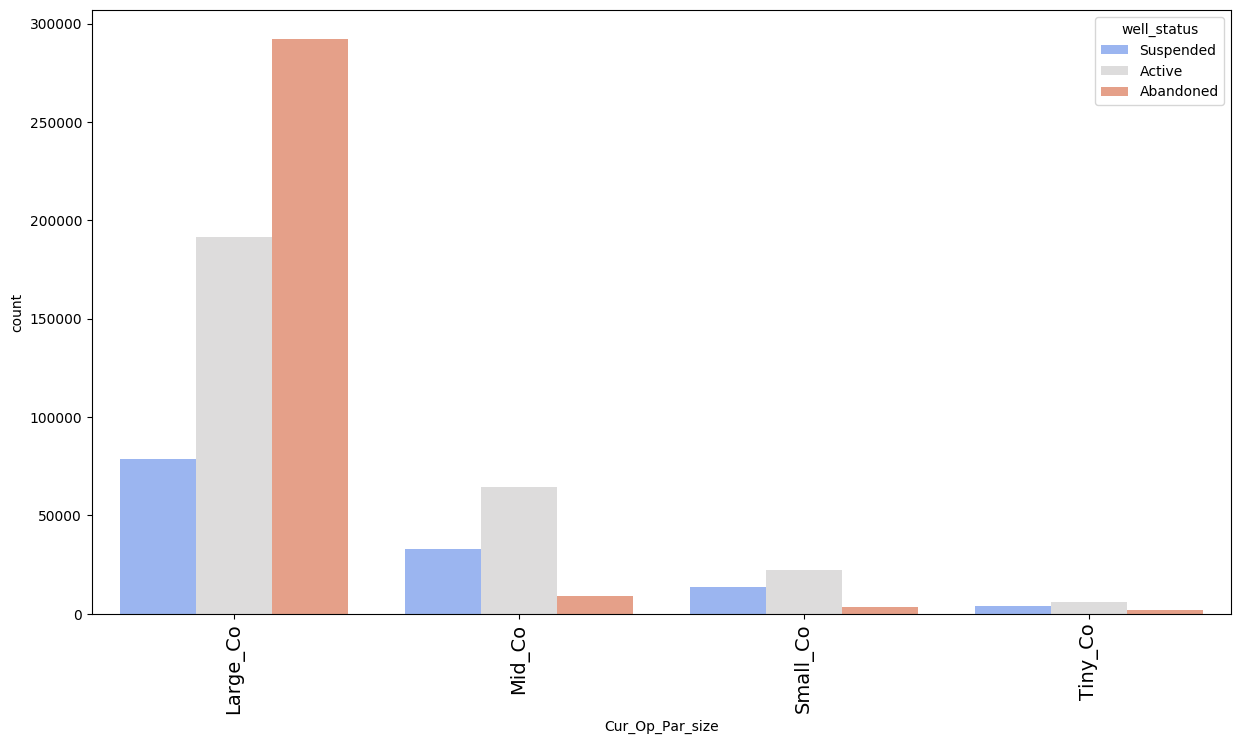

In [52]:
# Worked! Use it.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=100, figsize = [14.7,8])
sns.countplot(df_train['Cur_Op_Par_size'], order = df_train['Cur_Op_Par_size'].value_counts().
              index  , hue=df_train['well_status'], palette ='coolwarm')
fig1.tight_layout= True
plt.xticks(rotation = 90, fontsize = 14)
;

In [53]:
# Too many small groups
# Maybe not the best feature to include. Drop for now, 
pd.DataFrame([df_train[df_train['well_status']=='Suspended']['CurrentOperatorID'].value_counts()/106314,
                   df_train[df_train['well_status']=='Active']['CurrentOperatorID'].value_counts()/234232,
                   df_train[df_train['well_status']=='Abandoned']['CurrentOperatorID'].value_counts()/248127], index = ['Suspended','Active', 'Abandoned']).transpose().sort_values('Abandoned', ascending = False).head(30)

,Suspended,Active,Abandoned
0.0,0.039111,0.016586,0.166358
86.0,0.045883,0.013751,0.009624
6.0,0.002352,0.014746,0.007218
50449.0,0.060143,0.051726,0.005219
294.0,0.000546,0.004099,0.002475
72646.0,0.013695,0.012633,0.001822
12828.0,0.034944,0.034987,0.001580
12746.0,0.007788,0.018836,0.001020
11121.0,0.007356,0.018943,0.000903
50192.0,0.003217,0.000956,0.000729


In [54]:
# Add to the next ML model .
# CurrentOperator
pd.DataFrame([df_train[df_train['well_status']=='Suspended']['Licensee'].value_counts()/106314,
                   df_train[df_train['well_status']=='Active']['Licensee'].value_counts()/234232,
                   df_train[df_train['well_status']=='Abandoned']['Licensee'].value_counts()/248127], index = ['Suspended','Active', 'Abandoned']).transpose().sort_values('Abandoned', ascending = False).head(30)

,Suspended,Active,Abandoned
Canadian Natural Resources Limited,0.277772,0.238277,0.188541
Husky Oil Operations Limited,0.086696,0.031990,0.085384
Cenovus Energy Inc.,0.023769,0.025838,0.043615
Conocophillips Canada Resources Corp.,0.001637,0.003078,0.034938
Suncor Energy Inc.,0.003650,0.004965,0.034144
Imperial Oil Resources Limited,0.002803,0.019071,0.031742
Devon Canada Corporation,0.024766,0.009222,0.023415
Ember Resources Inc.,0.008607,0.051641,0.022114
Crescent Point Energy Corp.,0.046476,0.043158,0.020054
Bp Canada Energy Group Ulc,NaN,0.000073,0.020030


In [55]:
# LicenseeParentCompany
# too many small groups. Drop it for now.
pd.DataFrame([df_train[df_train['well_status']=='Suspended']['LicenseeParentCompany'].value_counts()/106314,
                   df_train[df_train['well_status']=='Active']['LicenseeParentCompany'].value_counts()/234232,
                   df_train[df_train['well_status']=='Abandoned']['LicenseeParentCompany'].value_counts()/248127], index = ['Suspended','Active', 'Abandoned']).transpose().sort_values('Suspended', ascending = False).head(30)

,Suspended,Active,Abandoned
159,0.280010,0.242665,0.194711
334,0.086696,0.031998,0.088507
168,0.046476,0.043167,0.020550
102,0.026093,0.026602,0.011994
241,0.024776,0.009234,0.028711
1424,0.024305,0.026060,0.046738
9689,0.022387,0.079374,0.011800
562,0.020938,0.013884,0.017551
9476,0.019753,0.003830,0.008363
9514,0.019198,0.005448,0.006557


In [56]:
# WellType
# would rather work with welltype standardized
pd.DataFrame([df_train[df_train['well_status']=='Suspended']['WellType'].value_counts()/106314,
                   df_train[df_train['well_status']=='Active']['WellType'].value_counts()/234232,
                   df_train[df_train['well_status']=='Abandoned']['WellType'].value_counts()/248127], index = ['Suspended','Active', 'Abandoned']).transpose().sort_values('Suspended', ascending = False).head(30)

,Suspended,Active,Abandoned
Gas,0.314173,0.339531,0.145377
Crude Oil,0.202278,0.125615,0.116908
Oil Production,0.182939,0.160849,0.014553
Not Applicable,0.180400,0.005584,0.468482
Gas Production,0.088098,0.095572,0.024911
Crude Bitumen,0.074995,0.027148,0.027111
Water Injection,0.028660,0.040737,0.012002
Commingled Oil,0.014457,NaN,0.000931
Undefined Undefined,0.011212,0.013978,0.045586
Gas Well,0.010902,0.000013,0.018281


In [57]:
# WellTypeStandardised
# Use it. Groupe it first
pd.DataFrame([df_train[df_train['well_status']=='Suspended']['WellTypeStandardised'].value_counts()/106314,
                   df_train[df_train['well_status']=='Active']['WellTypeStandardised'].value_counts()/234232,
                   df_train[df_train['well_status']=='Abandoned']['WellTypeStandardised'].value_counts()/248127], index = ['Suspended','Active', 'Abandoned']).transpose().sort_values('Suspended', ascending = False).head(30)

,Suspended,Active,Abandoned
Gas,0.409532,0.438907,0.193602
Oil,0.408121,0.314077,0.244238
Unspecified,0.191621,0.019583,0.514075
Bitumen,0.080921,0.030752,0.035268
Injection - Water,0.028952,0.043060,0.015230
Commingled - Oil,0.014457,0.000329,0.000931
Commingled - Gas,0.014147,0.000013,0.000161
Oil Sands Evaluation,0.012077,0.004030,0.141548
Disposal - Water,0.007807,0.010199,0.004796
Coalbed Methane,0.007722,0.077773,0.001314


In [58]:
Commingled = dict.fromkeys(['Commingled - Water','Commingled Injection - Water','Commingled Observation',
                   'Commingled Disposal - Water','Commingled Bitumen'], 'Commingled')
Disposal = dict.fromkeys(['Disposal - Gas','Disposal - Brine','Disposal - Waste','Disposal - Acid Gas',
                          'Disposal - Water','Disposal - Salt Water','Commingled Disposal - Water','Salt Water',
                          'Industrial Waste'], 'Disposal')
Injection = dict.fromkeys(['Injection - Unspecified','Injection - Salt Water','Injection - Gas','Injection - Solvent',
                           'Injection - Nitrogen','Injection - Steam','Injection - Water','Injection - CO2',
                           'Injection - Air (Combustion)','Injection - Oxygen',''], 'Injection')
SAGD_Polymer = dict.fromkeys(['Commingled Injection - Steam','Injection - Water Alternating Gas','SAGD',
                              'Oil - Cyclical','Injection - Polymer',''],'SAGD_Polymer')       
Other_Waters = dict.fromkeys(['Farm Water','Source Water','Water Source','Domestic Water'],'Other_Waters')
Test = dict.fromkeys(['Experimental','Test Hole','Stratigraphic Test','Test', 'Training',
                              'Evaluation','Oil Sands Evaluation','Injetcion - Polymer'],'Test_Hole')
Confidential = dict.fromkeys(['Potash','Confidential'],'Confidential')

df_train['My_Well_Types'] = df_train['WellTypeStandardised'].replace('Commingled - Oil','Commingled Oil'
).replace('Commingled - Gas','Commingled Gas').replace('Commingled Coalbed Methane','Commingled Gas'
).replace('Disposal - Unspecified','Unspecified').replace('Development Service Well','Unspecified'
).replace('Oil & Gas','Oil').replace('Crude Oil Observation', 'Observation').replace('Farm Gas','Gas'
).replace('Storage - LPG','Gas').replace('Storage - Gas','Commingled Gas')

df_train['My_Well_Types'] = df_train['My_Well_Types'] .replace(Commingled
                                                                            ).replace(Disposal
                                                                                      ).replace(SAGD_Polymer
                                                                                                ).replace(Injection
                                                                                                          ).replace(Test
                                                                                                                    ).replace(Other_Waters
                                                                                                                              ).replace(Confidential)

df_train['My_Well_Types'].nunique()

19

In [0]:
# WellTypeStandardised
My_well_type_df = pd.DataFrame([df_train[df_train['well_status']=='Suspended']['My_Well_Types'].value_counts(),
                   df_train[df_train['well_status']=='Active']['My_Well_Types'].value_counts(),
                   df_train[df_train['well_status']=='Abandoned']['My_Well_Types'].value_counts()], index = ['Suspended','Active', 'Abandoned']).transpose()
My_well_type_df.fillna(value=0,inplace=True)
My_well_type_df['Well_Count']= My_well_type_df['Abandoned']+My_well_type_df['Active']+My_well_type_df['Suspended']
My_well_type_df.sort_values('Well_Count', inplace = True, ascending=False)


In [0]:
My_well_type_df['Supended_ratio'] = My_well_type_df['Suspended']/My_well_type_df['Well_Count']
My_well_type_df['Active_ratio'] = My_well_type_df['Active']/My_well_type_df['Well_Count']
My_well_type_df['Abandoned_ratio'] = My_well_type_df['Abandoned']/My_well_type_df['Well_Count']
My_well_type_df.sort_values('Supended_ratio', inplace = True, ascending=False)

In [61]:
My_well_type_df


,Suspended,Active,Abandoned,Well_Count,Supended_ratio,Active_ratio,Abandoned_ratio
Confidential,185,24,22,231,0.800866,0.103896,0.095238
Commingled Oil,1545,350,256,2151,0.718271,0.162715,0.119014
Water,737,456,711,1904,0.387080,0.239496,0.373424
Bitumen,8603,7203,8751,24557,0.350328,0.293318,0.356355
Oil,43390,73567,60607,177564,0.244363,0.414313,0.341325
Gas,43568,102938,48089,194595,0.223891,0.528986,0.247124
Injection,3616,10761,4358,18735,0.193008,0.574380,0.232613
Other,215,208,713,1136,0.189261,0.183099,0.627641
Disposal,896,2670,1338,4904,0.182708,0.544454,0.272838
Unspecified,20662,4645,128323,153630,0.134492,0.030235,0.835273


''

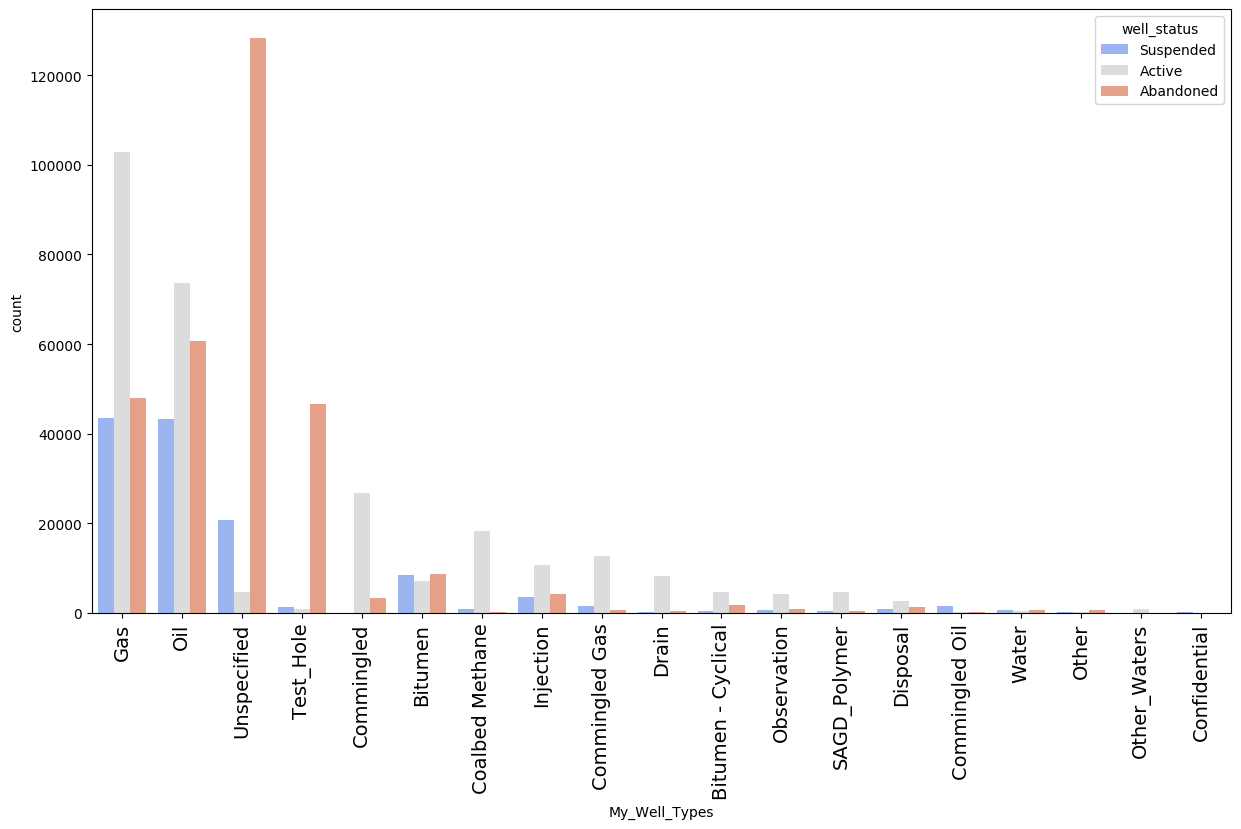

In [62]:

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=100, figsize = [14.7,8])
sns.countplot(df_train['My_Well_Types'], order = df_train['My_Well_Types'].value_counts().
              index  , hue=df_train['well_status'], palette ='coolwarm')
fig1.tight_layout= True
plt.xticks(rotation = 90, fontsize = 14)
;

## Lets go and try ML with new items: My_Well_Types and Cur_Op_Par_size

## Not important Columns to drop

In [63]:
# List of columns with too many null values: must be dropped
null_cols_to_drop = list(df_train.isnull().sum()[df_train.isnull().sum()>450000].index)
null_cols_to_drop

['CurrentOperatorID',
 'LicenseeID',
 'SurfAbandonDate',
 'UnitID',
 'UnitName',
 'Municipality',
 'CompletionDate',
 '_Max`Prod`(BOE)',
 '_Fracture`Stages',
 '_Completion`Events']

### Keep Fracture, Events and Max BOE Columns

In [64]:
null_cols_to_drop.remove('_Completion`Events')
null_cols_to_drop.remove('_Fracture`Stages')
null_cols_to_drop.remove('_Max`Prod`(BOE)')
null_cols_to_drop.remove('SurfAbandonDate')


null_cols_to_drop

['CurrentOperatorID',
 'LicenseeID',
 'UnitID',
 'UnitName',
 'Municipality',
 'CompletionDate']

- Cant drop any of the provinces because there is a good representation of them in the test dataset

In [65]:
df_train['Province'].value_counts()

Alberta             531637
Saskatchewan        141850
British Columbia     36749
Manitoba             10568
Name: Province, dtype: int64

In [0]:
#df_clas_header_test['Province'].value_counts()

In [67]:
pd.unique(df_train['SurveySystem'])

array(['DLS', 'NTS'], dtype=object)

In [68]:
df_train['Province'][df_train['SurveySystem']=='NTS'].value_counts()

British Columbia    26128
Name: Province, dtype: int64

In [0]:
#df_clas_header_test['Province'][df_train['SurveySystem']=='NTS'].value_counts()

## Colomns with similarities to drop

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 94 columns):
EPAssetsId                 720804 non-null int64
well_status                720804 non-null object
well_status_code           720804 non-null int64
Province                   720804 non-null object
LicenceNumber              720804 non-null object
UWI                        720803 non-null object
CurrentOperator            720804 non-null object
CurrentOperatorParent      720804 non-null int64
CurrentOperatorID          152031 non-null float64
Licensee                   720804 non-null object
LicenseeParentCompany      720804 non-null int64
LicenseeID                 10568 non-null float64
LicenceDate                720790 non-null object
WellType                   720804 non-null object
WellTypeStandardised       720804 non-null object
ConfidentialReleaseDate    379975 non-null object
SurfAbandonDate            185090 non-null object
WellName                   720240 non-null

In [0]:
#pd.unique(df_train[df_train['well_status']=='Abandoned']['Municipality'])

In [0]:
#pd.unique(df_train[df_train['well_status']=='Active']['Municipality'])

In [73]:
useless_cols = ['UWI',
                'WellType',
 'ConfidentialReleaseDate',
 'WellName',
 'SurveySystem',
 'Surf_Location',
 'Surf_Township',
 'Surf_Meridian',
 'Surf_Range',
 'Surf_Section',
 'Surf_LSD',
 'Surf_Longitude',
 'Surf_Latitude',
 'Surf_TownshipRange',
 'Surf_QuarterUnit',
 'Surf_Unit',
 'Surf_Block',
 'Surf_NTSMapSheet',
 'Surf_Series',
 'Surf_Area',
 'Surf_Sheet',
 'Surf_QuarterSection',
 'BH_Location',
 'BH_TownshipRange',
 'BH_QuarterUnit',
 'BH_Unit',
 'BH_Block',
 'BH_NTSMapSheet',
 'BH_Series',
 'BH_Area',
 'BH_Sheet',
 'BH_QuarterSection',
 'BH_Longitude',
 'BH_Latitude',
 'BH_Township',
 'BH_Meridian',
 'BH_Range',
 'BH_Section',
 'BH_LSD',
 'GroundElevation',
 'KBElevation',
 'SurfaceOwner',
 'DrillingContractor',
 'SpudDate',
 'RigReleaseDate',
 'DaysDrilling',
 'DrillMetresPerDay',
 'Country',
 'RegulatoryAgency',
 'NumberofWells',
 'ProjectedDepth',
 'StatusSource',
 'UnitID',
 'UnitName',
 'UnitFlag',
 'Municipality',
 'CompletionDate',
 'Agent']
useless_cols[0],useless_cols[len(useless_cols)-1]

('UWI', 'Agent')

In [0]:
overlaping_cols_to_drop =[
 'CurrentOperator',
 'CurrentOperatorParent',
 'Licensee',
 'LicenseeParentCompany',
 'WellType',
 'WellName',
 'OSArea']

df_test = pd.DataFrame(data=np.arange(92).reshape(1,92), columns=features_lst)
df_test

for i in range(len(overlaping_cols_to_drop)):
    if overlaping_cols_to_drop[i] in list(df_test.columns):
        df_test.drop(overlaping_cols_to_drop[i], axis = 1, inplace=True)

for i in range(len(useless_cols)):
    if useless_cols[i] in list(df_test.columns):
        df_test.drop(useless_cols[i], axis = 1, inplace=True)
        
for i in range(len(null_cols_to_drop)):
    if null_cols_to_drop[i] in list(df_test.columns):
        df_test.drop(null_cols_to_drop[i], axis = 1, inplace=True)
        
df_test.info()

In [75]:
for i in range(len(overlaping_cols_to_drop)):
    if overlaping_cols_to_drop[i] in list(df_train.columns):
        df_train.drop(overlaping_cols_to_drop[i], axis = 1, inplace=True)

for i in range(len(useless_cols)):
    if useless_cols[i] in list(df_train.columns):
        df_train.drop(useless_cols[i], axis = 1, inplace=True)
        
for i in range(len(null_cols_to_drop)):
    if null_cols_to_drop[i] in list(df_train.columns):
        df_train.drop(null_cols_to_drop[i], axis = 1, inplace=True)
        
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 29 columns):
EPAssetsId              720804 non-null int64
well_status             720804 non-null object
well_status_code        720804 non-null int64
Province                720804 non-null object
LicenceNumber           720804 non-null object
LicenceDate             720790 non-null object
WellTypeStandardised    720804 non-null object
SurfAbandonDate         185090 non-null object
WellNameAmended         720240 non-null object
Formation               720804 non-null object
Field                   720804 non-null object
Pool                    720528 non-null object
TotalDepth              713345 non-null float64
LaheeClass              720804 non-null object
Confidential            720804 non-null object
OSDeposit               683126 non-null object
FinalDrillDate          661778 non-null object
TVD                     676808 non-null float64
WellProfile             720804 non-null obj

In [0]:
df_train['LicenceDate'] = pd.to_datetime(df_train['LicenceDate'].str.split(' ', 0).str[0])
df_train['SurfAbandonDate'] = pd.to_datetime(df_train['SurfAbandonDate'].str.split(' ', 0).str[0])
df_train['FinalDrillDate'] = pd.to_datetime(df_train['FinalDrillDate'].str.split(' ', 0).str[0])
df_train['StatusDate'] = pd.to_datetime(df_train['StatusDate'].str.split(' ', 0).str[0])

In [77]:
# calculating the number of days between getting the license and reporting the status
days_to_stat= df_train['StatusDate']-df_train['LicenceDate']
days_to_stat.isnull().sum()

95

In [78]:
days_to_stat[days_to_stat<pd.Timedelta('0 days +00:00:00')] = np.nan
days_to_stat.isnull().sum()

1234

In [0]:
# Storing the number of days as a floating number in a new columns
df_train['Days_to_StatusDate'] = days_to_stat.dt.days

In [80]:
# Check to see if we have same number of null values before and after creating the column
days_to_stat.isnull().sum() , df_train['Days_to_StatusDate'].isnull().sum() 

(1234, 1234)

In [0]:
df_train.replace('NaN',np.nan ,inplace=True)
df_train.replace('None',np.nan ,inplace=True)

In [82]:
df_train.head(5)

,EPAssetsId,well_status,well_status_code,Province,LicenceNumber,LicenceDate,WellTypeStandardised,SurfAbandonDate,WellNameAmended,Formation,Field,Pool,TotalDepth,LaheeClass,Confidential,OSDeposit,FinalDrillDate,TVD,WellProfile,WellSymbPt1,PSACAreaCode,PSACAreaName,StatusDate,_Max`Prod`(BOE),_Fracture`Stages,_Open`Hole,_Completion`Events,Cur_Op_Par_size,My_Well_Types,Days_to_StatusDate
0,2314251,Suspended,2,Alberta,0133238,1988-03-22,Gas,NaT,Cve Edson 12-18-49-16,Mannville,Edson,Commingled Pool 017,3044.0,Development,Non-Confidential,Not Applicable,1993-04-05,3044.00,Vertical,Gas,AB2,Foothills Front,2003-12-01,NaN,NaN,CasedCompleted,NaN,Large_Co,Gas,5732.0
1,2341273,Active,1,Alberta,0419701,2010-04-09,Bitumen,NaT,Cnrl 1b St. Paul 1-15-54-7,Dina,Derwent,Lower Grand Rapids,785.0,Development,Non-Confidential,Lower Grand Rapids,2010-07-27,628.77,Directional,Oil,AB4,East Central Alberta,2010-08-31,95.38271,NaN,CasedCompleted,NaN,Large_Co,Bitumen,144.0
2,1086314,Abandoned,0,Saskatchewan,11E153,2011-05-16,Oil,NaT,HUSKY WESTHAZEL A2-31-50-22,Paleozoic,Westhazel General Petroleum,Westhazel General Petroleum,621.0,Development,Non-Confidential,Not Applicable,2011-08-24,621.00,Vertical,Oil,SK1,Central Saskatchewan,2011-05-16,NaN,NaN,CasedCompleted,NaN,Large_Co,Oil,0.0
3,2210835,Abandoned,0,Alberta,0088786,1981-02-04,Oil,NaT,Caltex_Res Provost 10-21-37-1,Unspecified,Provost,Upper Mannville A,830.0,Outpost,Non-Confidential,Not Applicable,1981-02-09,830.00,Vertical,Oil,AB4,East Central Alberta,1987-02-19,NaN,NaN,CasedCompleted,NaN,Large_Co,Oil,2206.0
4,40946,Suspended,2,British Columbia,31827,2015-11-30,Unspecified,NaT,Leucrotta Two Rivers 16-30-082-16,Unspecified,Other Areas,Unspecified,1977.2,Outpost,Non-Confidential,NaN,NaT,NaN,Vertical,Other,BC2,Northern British Columbia,2016-07-14,NaN,NaN,CasedCompleted,NaN,Small_Co,Unspecified,227.0


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 30 columns):
EPAssetsId              720804 non-null int64
well_status             720804 non-null object
well_status_code        720804 non-null int64
Province                720804 non-null object
LicenceNumber           720804 non-null object
LicenceDate             720790 non-null datetime64[ns]
WellTypeStandardised    720804 non-null object
SurfAbandonDate         185090 non-null datetime64[ns]
WellNameAmended         720240 non-null object
Formation               720804 non-null object
Field                   720804 non-null object
Pool                    720528 non-null object
TotalDepth              713345 non-null float64
LaheeClass              720804 non-null object
Confidential            720804 non-null object
OSDeposit               683126 non-null object
FinalDrillDate          661778 non-null datetime64[ns]
TVD                     676808 non-null float64
WellProfile        

In [84]:
df_train.nunique()

EPAssetsId              720804
well_status                  3
well_status_code             3
Province                     4
LicenceNumber           575216
LicenceDate              20331
WellTypeStandardised        65
SurfAbandonDate          23416
WellNameAmended         556596
Formation                  615
Field                     2003
Pool                     11917
TotalDepth               27224
LaheeClass                  17
Confidential                 5
OSDeposit                   14
FinalDrillDate           27610
TVD                     107546
WellProfile                  5
WellSymbPt1                  5
PSACAreaCode                15
PSACAreaName                15
StatusDate               26515
_Max`Prod`(BOE)         102442
_Fracture`Stages           133
_Open`Hole                   2
_Completion`Events         325
Cur_Op_Par_size              4
My_Well_Types               19
Days_to_StatusDate       21379
dtype: int64

Abandoned    307358
Active       284243
Suspended    129203
Name: well_status, dtype: int64

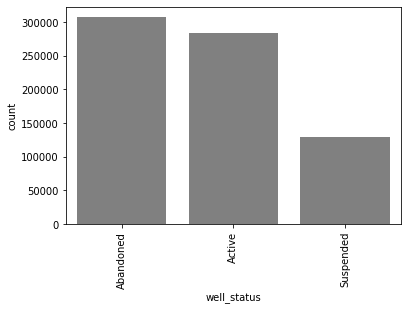

In [85]:
# univariate plots
fig1,axes=plt.subplots(nrows=1,ncols=1)
sns.countplot(df_train['well_status'], order = df_train.well_status.value_counts().
              index ,color = '0.5' )
plt.xticks(rotation = 90)
;
df_train['well_status'].value_counts()

Active       62309
Abandoned    48125
Suspended    31416
Name: well_status, dtype: int64

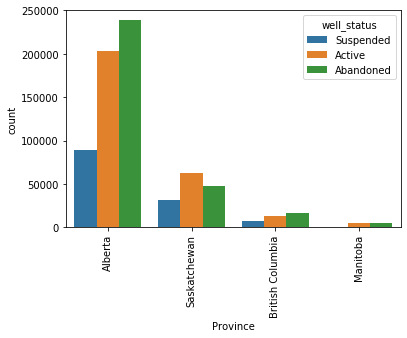

In [86]:
# univariate plots
# doesnt seemto be a good classifier, especially considering there is a finer geographical 
# classifier in PSACArea parameters
# Leave it out.
fig1,axes=plt.subplots(nrows=1,ncols=1)
sns.countplot(df_train['Province'], order = df_train.Province.value_counts().
              index , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['Province']=='Saskatchewan']['well_status'].value_counts()

Development                 462345
New Pool Wildcat             69280
Outpost                      58134
Oil Sands Evaluation         37639
Deeper Pool Test             26562
New Field Wildcat            22632
Development Service Well     11619
Test Hole                    10858
Other                         7955
Unspecified                   6835
Re-entry                      3449
Experimental                  3044
Confidential                   411
Potash Test Hole                19
Non Issued Licence              13
Shallower Pool Test              8
Deeper Pool Wildcat              1
Name: LaheeClass, dtype: int64

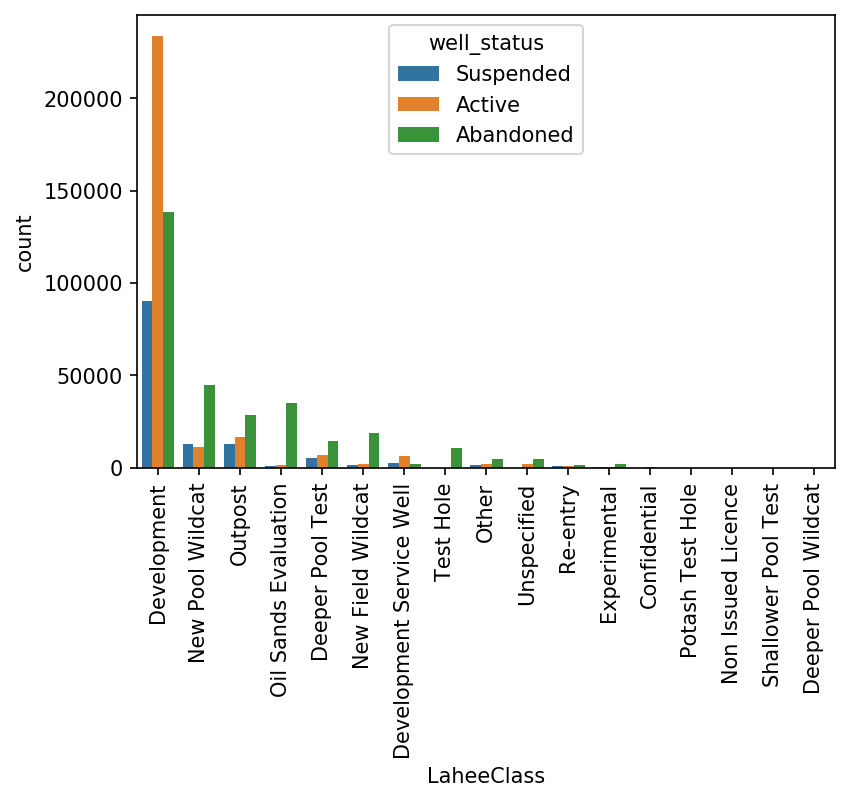

In [87]:
# univariate plots
# looks like a great identifier for abandoned wells. If the LaheeClass != Developmet, 
# there is a 64% chance that the well is abandoned
# Add 'Development Service Well' to that as well
# Use it!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['LaheeClass'], order = df_train.LaheeClass.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
# df_train[df_train['LaheeClass']!='Development']['well_status'].value_counts()/(136095+41801+31947)
df_train['LaheeClass'].value_counts()

Active       12067
Abandoned     8065
Suspended     1763
Name: well_status, dtype: int64

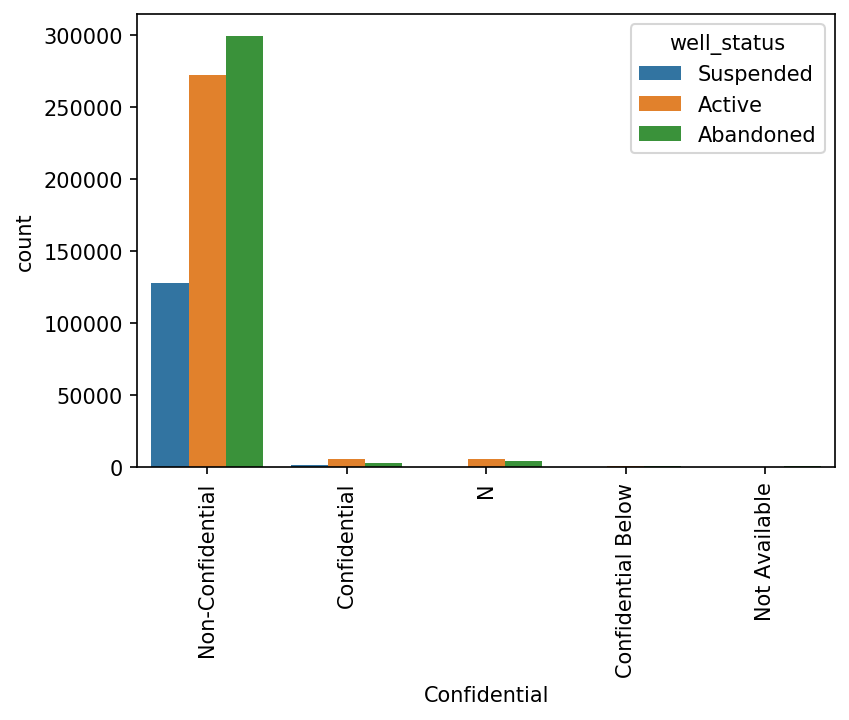

In [88]:
# univariate plots
# doesnt seem to be a good classifier. 
# leave it out
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['Confidential'], order = df_train.Confidential.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['Confidential']!='Non-Confidential']['well_status'].value_counts()

Not Applicable          647031
Wabiskaw-Mcmurray        12414
Lower Grand Rapids        9543
Clearwater                7228
Upper Grand Rapids        5178
Bluesky-Gething           1536
Clearwater Undefined       111
Grosmont                    47
Pekisko Undefined           29
Middle Grand Rapids          3
Nisku                        3
Upper Debolt                 1
Shunda                       1
Belloy                       1
Name: OSDeposit, dtype: int64

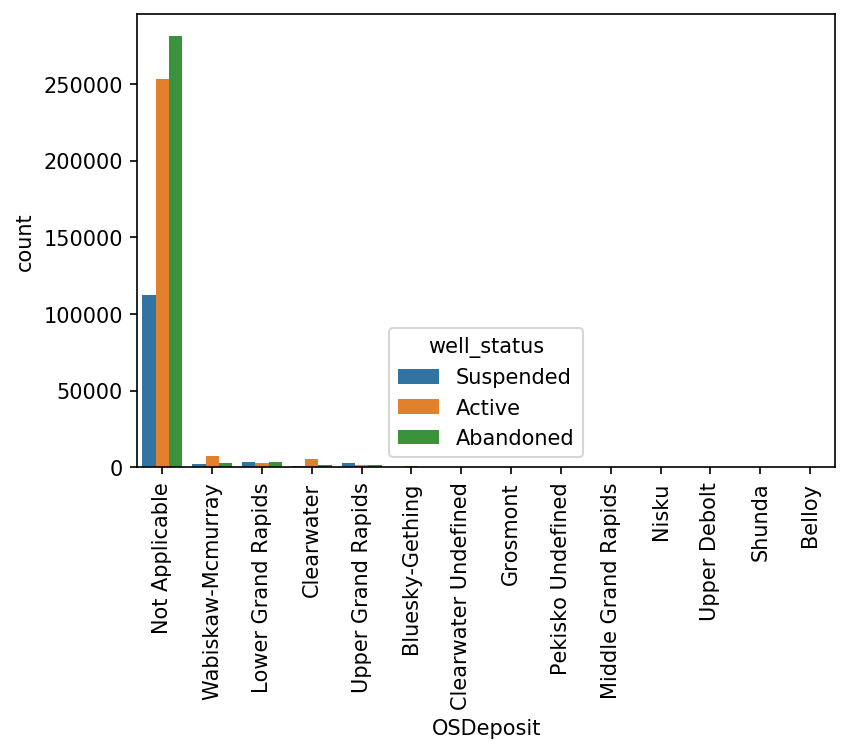

In [89]:
# univariate plot
# OSDeposit desnt seem to be a good dummy variable. df_train['OSDeposit']!= Not Applicable has 
# too few data points. The difference in ratio of Abondoned vs Active for 2 major classes is not that
# large(data in the next 2 cells)
# leave it out!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['OSDeposit'], order = df_train.OSDeposit.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['OSDeposit'].value_counts()

In [90]:
df_train[df_train['OSDeposit']=='Not Applicable']['well_status'].value_counts()/(528084)


Abandoned    0.533080
Active       0.479732
Suspended    0.212430
Name: well_status, dtype: float64

In [91]:
df_train[df_train['OSDeposit']!='Not Applicable']['well_status'].value_counts()/(588673-528084)

Active       0.510060
Abandoned    0.426596
Suspended    0.280942
Name: well_status, dtype: float64

Vertical          507930
Directional       112253
Horizontal        100480
Horizontal Leg        79
Slant                 62
Name: WellProfile, dtype: int64

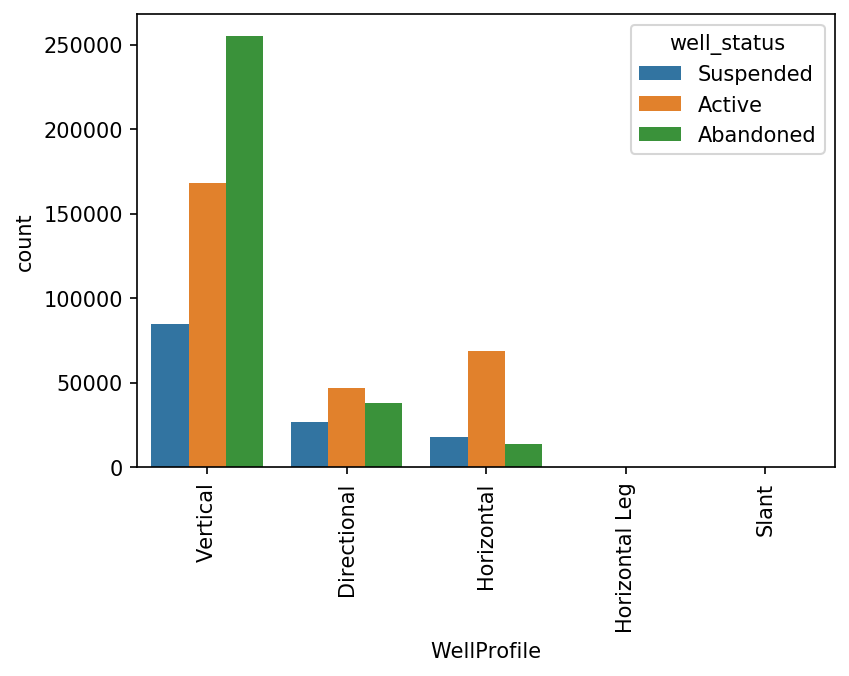

In [92]:
# univariate plots
# Awsome, probably need to drop last 2 categories, then use remaining 3 categories
# use it!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['WellProfile'], order = df_train.WellProfile.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['WellProfile'].value_counts()


Other        246701
Gas          231307
Oil          218027
Injection     24763
Oil & Gas         6
Name: WellSymbPt1, dtype: int64

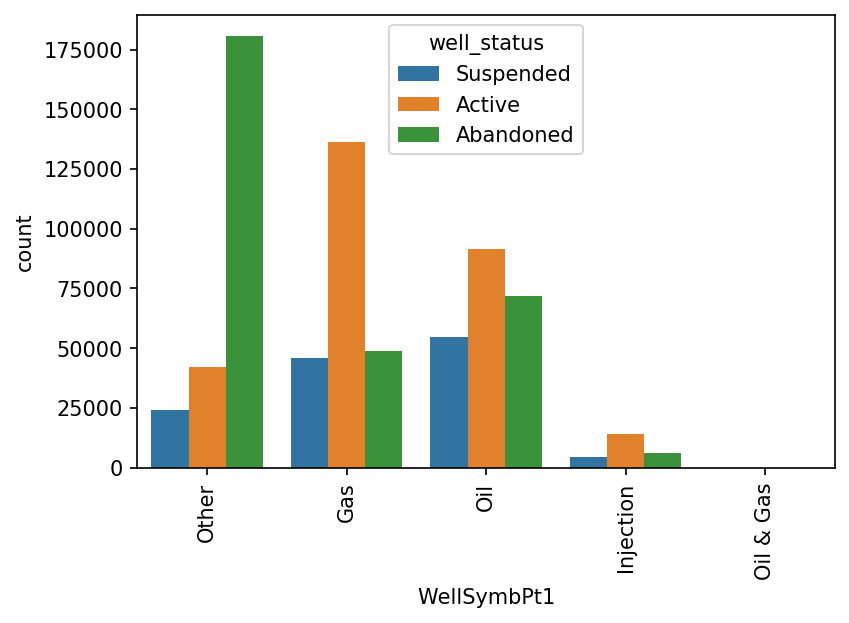

In [93]:
# univariate plots
# too good to dismiss. 
# Use it!

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['WellSymbPt1'], order = df_train.WellSymbPt1.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['WellSymbPt1'].value_counts()

AB3    164656
AB5     88016
AB6     81814
AB2     70940
AB4     67829
SK2     58189
AB7     55035
SK1     42068
SK3     41593
BC2     36215
MB      10568
AB1      3347
BC1       398
BC0        98
BC3        38
Name: PSACAreaCode, dtype: int64

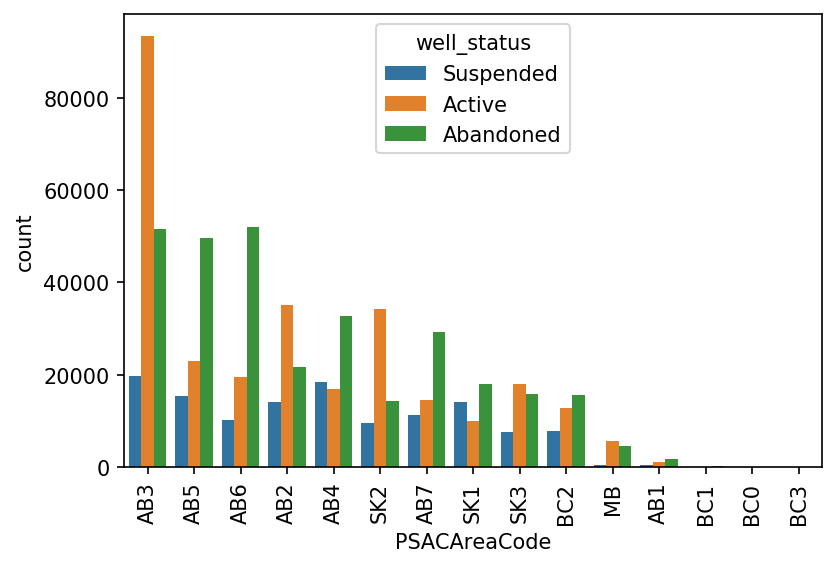

In [94]:
# univariate plots
# would be awsome to use all the categories as opposed to 0-1 dummies
# regardless, use it!

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['PSACAreaCode'], order = df_train.PSACAreaCode.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['PSACAreaCode'].value_counts()

Southeastern Alberta         164656
Central Alberta               88016
Northeastern Alberta          81814
Foothills Front               70940
East Central Alberta          67829
Southwestern Saskatchewan     58189
Northwestern Alberta          55035
Central Saskatchewan          42068
Eastern Saskatchewan          41593
Northern British Columbia     36215
Manitoba                      10568
Foothills                      3347
Southern British Columbia       398
Other British Columbia           98
Coastal British Columbia         38
Name: PSACAreaName, dtype: int64

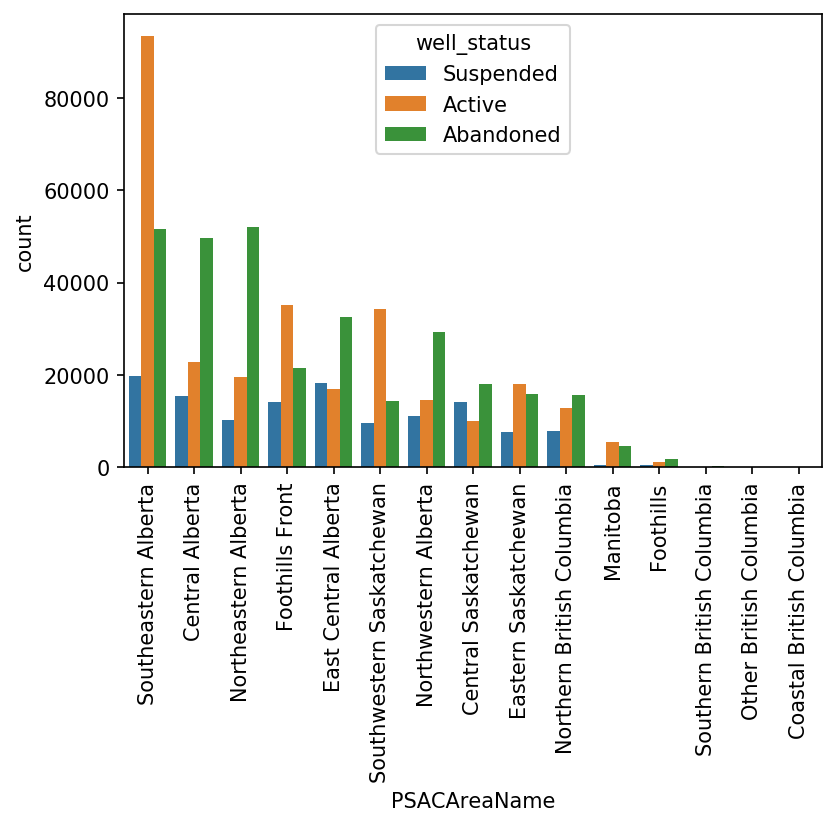

In [95]:
# univariate plots
# same as 'PSACAreaCode'.
# Drop it.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['PSACAreaName'], order = df_train.PSACAreaName.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['PSACAreaName'].value_counts()

''

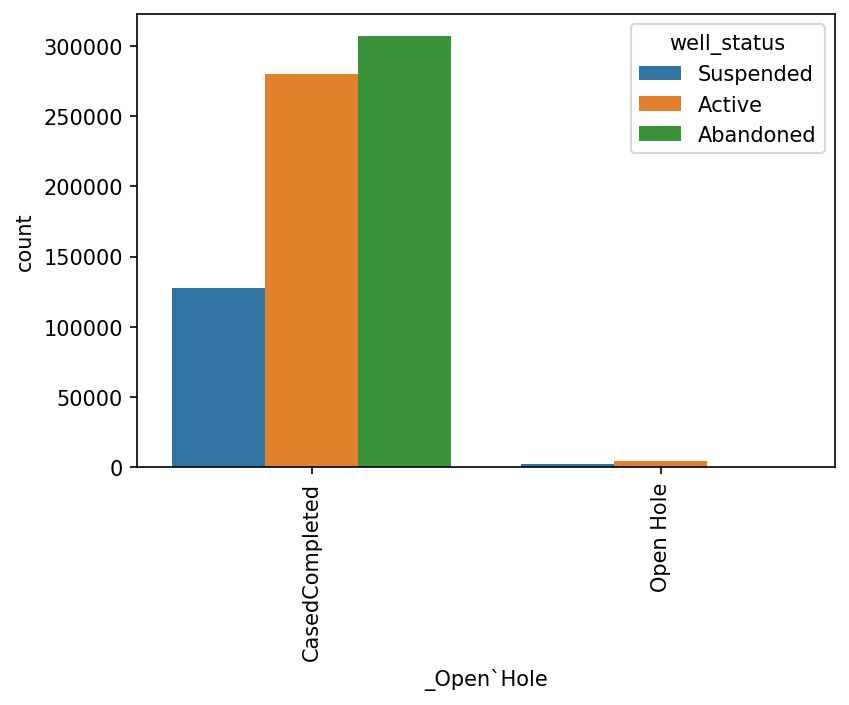

In [96]:
# univariate plots
# Not good!
# leave it out.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['_Open`Hole'], order = df_train['_Open`Hole'].value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;

''

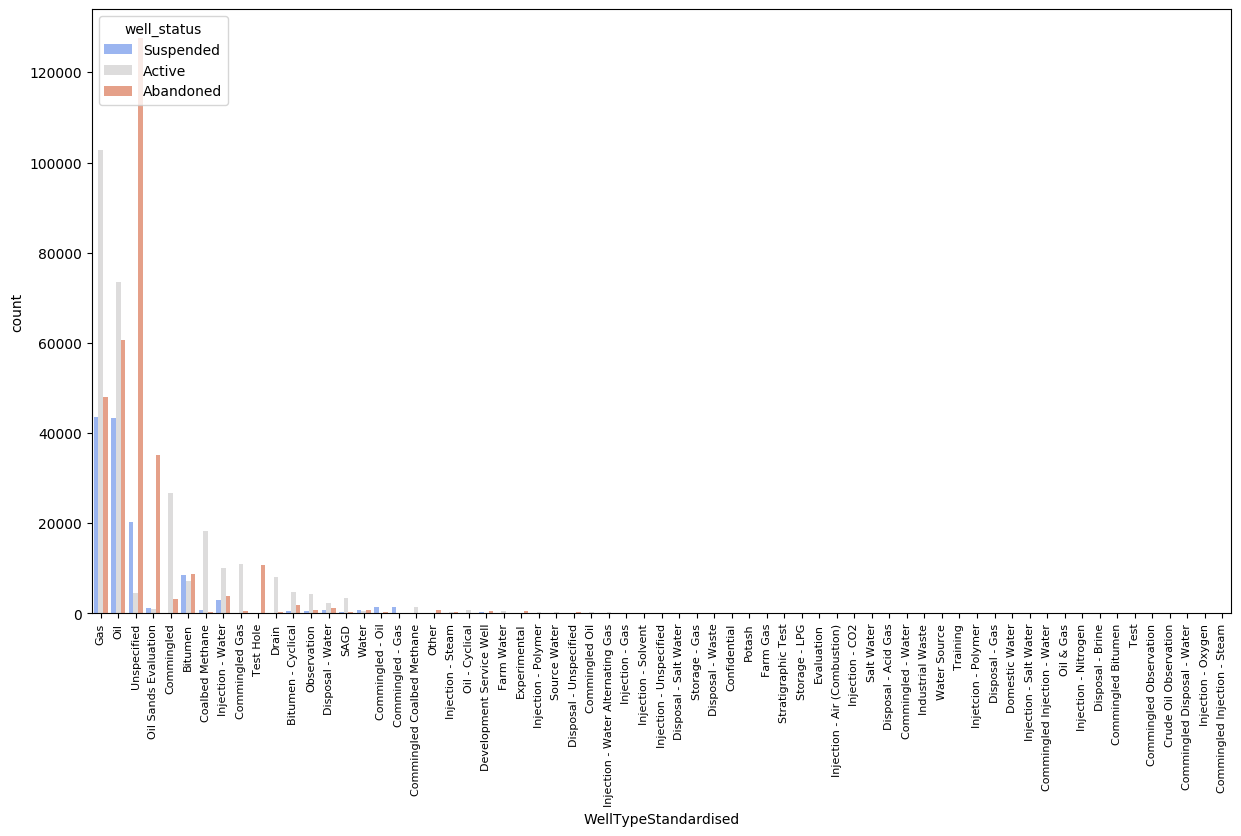

In [97]:
# This is a good one, but needs more work to clear and create a few categories from it.
# Add it to the second phase of machin learning maybe

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=100, figsize = [14.7,8])
sns.countplot(df_train['WellTypeStandardised'], order = df_train['WellTypeStandardised'].value_counts().
              index  , hue=df_train['well_status'], palette ='coolwarm')
fig1.tight_layout= True
plt.xticks(rotation = 90, fontsize = 8)
;

''

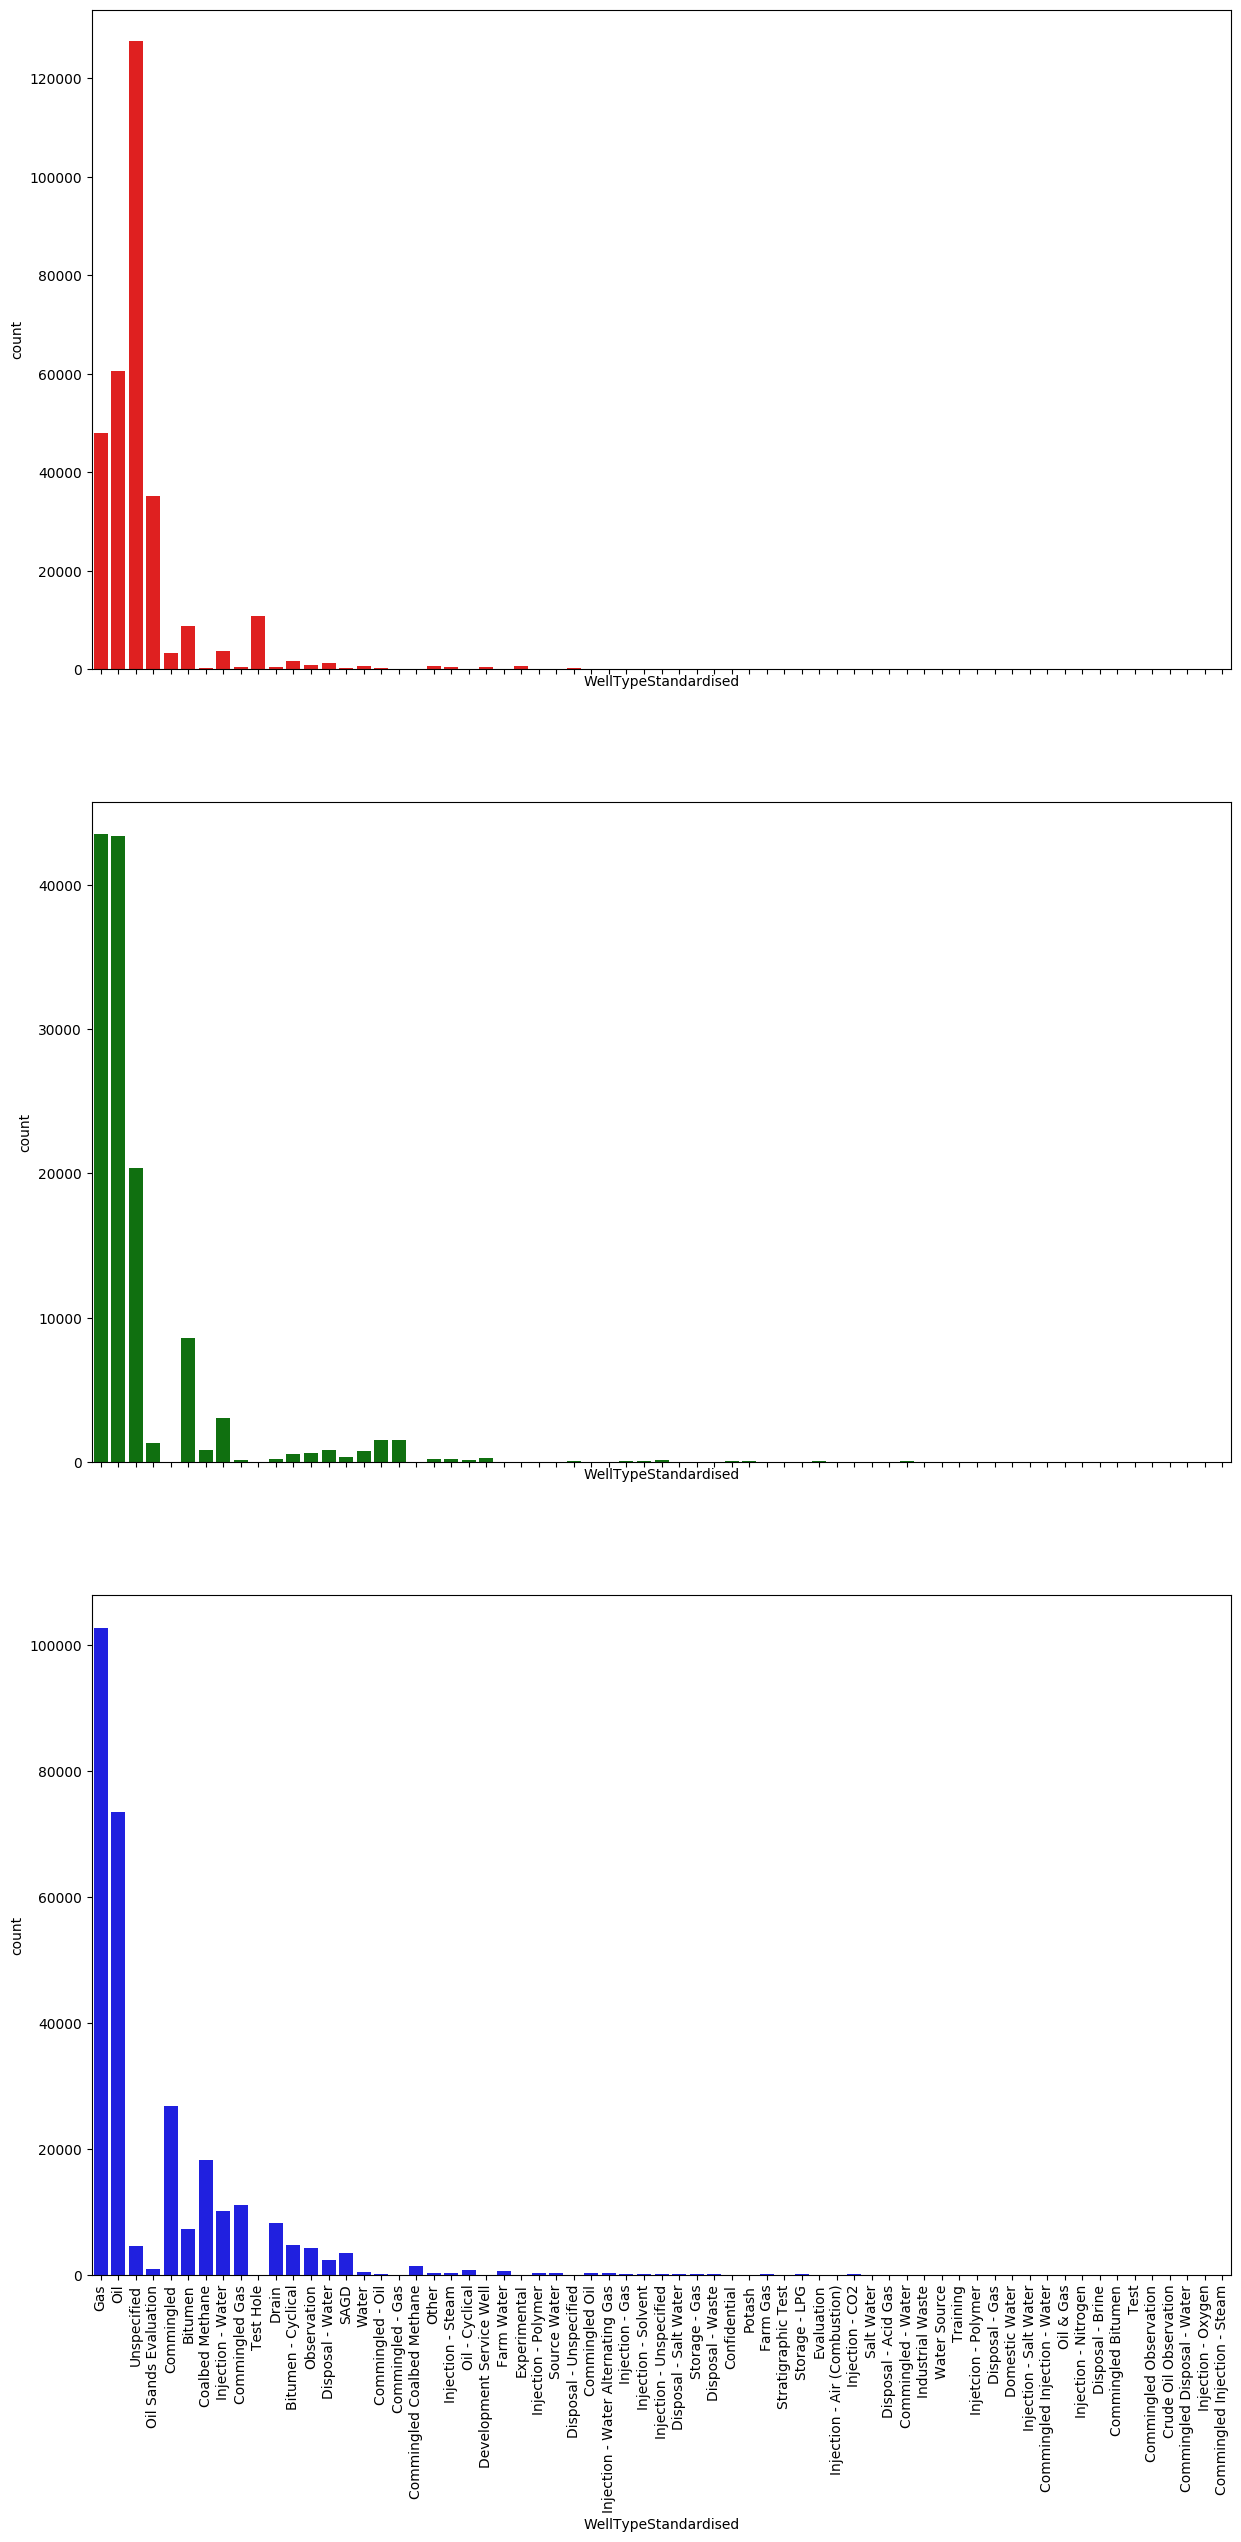

In [98]:
# univariate plots
# A better picture from the one above.
# 


fig1,(ax_Ab,ax_sus,ax_act) = plt.subplots(nrows=3,ncols=1,dpi=100, sharex=True, gridspec_kw={"height_ratios": (.33, .33, .34)}, figsize = [14.7,30])
sns.countplot(df_train['WellTypeStandardised'][df_train['well_status']=='Abandoned'], ax= ax_Ab, order = df_train['WellTypeStandardised'].value_counts().
              index ,orient= 'h', color = 'r' )
sns.countplot(df_train['WellTypeStandardised'][df_train['well_status']=='Suspended'], ax= ax_sus, order = df_train['WellTypeStandardised'].value_counts().
              index ,orient= 'h',color = 'g' )
sns.countplot(df_train['WellTypeStandardised'][df_train['well_status']=='Active'], ax= ax_act, order = df_train['WellTypeStandardised'].value_counts().
              index ,orient= 'h', color = 'b' )
fig1.tight_layout= True
plt.xticks(rotation = 90, fontsize = 10)
;

In [99]:
df_train['_Open`Hole'].value_counts()

CasedCompleted    714848
Open Hole           5956
Name: _Open`Hole, dtype: int64

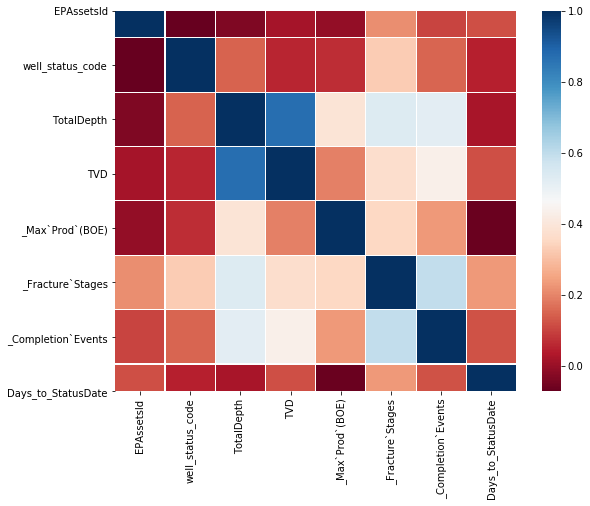

In [100]:
# Total Depth may be a usefull parameter. Further investigate. 
corr = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

In [101]:
# License number is alpha numerical, can't include it in prediction
# Leave it out.
df_train['LicenceNumber'].sample(10)

417177     0345717
614272      83J125
245256    0044850C
574848     0411718
469224     0324241
580580      00H250
470713     0335191
148562     0305415
181511    0003823K
613371      05K214
Name: LicenceNumber, dtype: object

In [102]:
# seems that almost all the wells with an existing SurfAbandonDate are abandoned
# Use it.

df_train[df_train['SurfAbandonDate'].notna()]['well_status'].value_counts()

Abandoned    183408
Suspended      1055
Active          627
Name: well_status, dtype: int64

In [103]:
# it seems a large portion of abondoned wells (50% +) belong to "Unspecified" Pool category, while it has 
# a smaller role in suspended wells and even smaller one for Active wells. 
# considering more than 11,000 pool types, "Pool == Unspecified" should simplify this and 
# create a good dummy variable
# create and Use 'Pool' dummy as stated above


#---------------------
# Similar but much weaker relationship exists for Unspecified Formation. But to avoid inter-relationship between
# features, it is should not be considered
# Leave "Formation" out.
#--------------------
# Same strong relationship doesnt exist for Field names
# Leave "Field" out.


df_train[df_train['well_status']=='Abandoned']['Pool'].value_counts()/248127

Unspecified               0.676919
Not Available             0.053565
Commingled MFP9501        0.030658
Commingled Pool 001       0.014077
Lower Grand Rapids        0.013078
                            ...   
Colony U4U                0.000004
Viking J2J                0.000004
Mannville JJJ             0.000004
Nancy C-021-A/094-G-08    0.000004
Graminia Undefined        0.000004
Name: Pool, Length: 7869, dtype: float64

In [104]:
df_train[df_train['well_status']=='Active']['Pool'].value_counts()/234232

Commingled MFP9501     0.307259
Unspecified            0.067847
Commingled MFP9529     0.032267
Wabiskaw-Mcmurray      0.032173
Commingled Pool 001    0.031144
                         ...   
Lower Edmonton W       0.000004
Mannville M7M          0.000004
Cardium X2X            0.000004
Granite Wash AA        0.000004
Belly River Q6Q        0.000004
Name: Pool, Length: 6683, dtype: float64

In [105]:
df_train[df_train['well_status']=='Suspended']['Pool'].value_counts()/106314

Unspecified            0.228484
Commingled MFP9501     0.048921
Commingled Pool 001    0.035122
Lower Grand Rapids     0.034455
Upper Grand Rapids     0.023337
                         ...   
Mannville V10V         0.000009
Rundle Undefined       0.000009
Basal Mannville XX     0.000009
D-3 U                  0.000009
Cummings V5V           0.000009
Name: Pool, Length: 6836, dtype: float64

In [106]:
# Seem extremely small TVD depth is associated with increased chance of having an abondoned well, 
# however larger TVDs dont shift the results one way or another
# it is difficult to see how this can help prediction
# test to see if it helps. 
df_train[df_train['TVD']<450]['well_status'].value_counts()/(48426+19728+7410)

Abandoned    0.789371
Active       0.316884
Suspended    0.120137
Name: well_status, dtype: float64

In [107]:
# Seem extremely smaller well depth is associated with increased chance of having an abondoned well, while
# relatively large well depth increases chance of having an active well.
# this might overlap with having a horizontal well
# regardless, this may be one of the input features. 
# Test to see if it helps

df_train[df_train['TotalDepth']>2000]['well_status'].value_counts()

Active       65900
Abandoned    31772
Suspended    24731
Name: well_status, dtype: int64

In [108]:
df_train.describe()

,EPAssetsId,well_status_code,TotalDepth,TVD,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events,Days_to_StatusDate
count,7.208040e+05,720804.000000,713345.000000,676808.000000,227813.000000,9315.000000,19816.000000,719570.000000
mean,2.020844e+06,0.752838,1220.151109,1035.869208,65.592566,20.542136,17.538656,2243.311460
std,9.083227e+05,0.737950,925.347699,733.736043,247.779377,18.052842,43.172174,3872.711401
min,1.000000e+00,0.000000,0.000000,0.000000,0.019619,1.000000,1.000000,0.000000
25%,2.001818e+06,0.000000,593.000000,554.100000,3.021377,2.000000,1.000000,17.000000
50%,2.211712e+06,1.000000,942.000000,807.000000,9.360448,20.000000,2.000000,194.000000
75%,2.420834e+06,1.000000,1622.000000,1351.852500,33.821802,29.000000,21.000000,3126.000000
max,7.012320e+06,2.000000,39867.000000,7260.000000,20177.542605,175.000000,686.000000,29620.000000


In [0]:
# Scatter plot of Loan Amount on Monthly Payments,for different loan Terms
#df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

#sns.scatterplot(y='HorizontalLegnth',x='''_Max`Prod`(BOE)''',data=df_train[df_train['well_status']=='Abandoned'], 
#           hue = 'WellProfile')



#   axis name for the boxplot
#plt.='''Original Loan Amount(USD)''')
#axes.set(ylabel='Monthly Loan Payment (USD)')
#plt.ylim(0,5000)
#plt.xlim(0,5000);
#plt.title('''Effect of Loan Amount(USD) on Monthly Payments(USD), 
#for different loan Terms(months)'''.title(), fontsize = 14, weight = 'bold');

In [0]:
# Scatter plot of Loan Amount on Monthly Payments,for different loan Terms
#df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

#sns.scatterplot(y='HorizontalLegnth',x='''well_status''',data=df_train, 
#           hue = 'WellProfile')

#   axis name for the boxplot
#plt.='''Original Loan Amount(USD)''')
#axes.set(ylabel='Monthly Loan Payment (USD)')
#plt.ylim(0,5000)
#plt.xlim(0,5000);
#plt.title('''Effect of Loan Amount(USD) on Monthly Payments(USD), 
#for different loan Terms(months)'''.title(), fontsize = 14, weight = 'bold');

In [0]:
# LoanOriginalAmount variation for each ProsperRating (numeric) category
#sns.boxplot(data=df_train, y='well_status', x='HorizontalLegnth', color='0.5')
#   axis name for the boxplot
#axes.set(ylabel='''Prosper Credit Rating("AA" is the Best, "E" is the Worst)''')
#axes.set(xlabel='Loan Original Amount(USD)')
#plt.xlim(-10,10);

In [112]:
# the effect of Days_to_StatusDate on well status does not seem to be linear. It also seems that it needs 
# more than 2 bins to help with classification
# To include it, we may need some classification work or hyper parameter tuning
# Test to see if it helps

df_train[df_train['Days_to_StatusDate']>80]['well_status'].value_counts()

Active       186962
Abandoned    165943
Suspended     80975
Name: well_status, dtype: int64

In [113]:
# _Max`Prod`(BOE) seems to be great for identifying Active wells
# _Max`Prod`(BOE) notnull can be a great dummy variable to help identifying Active wells
# use it, but pleaeaeaease change the name!
df_train[df_train['''_Max`Prod`(BOE)''']>0]['well_status'].value_counts()/187602

Active       1.044440
Suspended    0.145985
Abandoned    0.023918
Name: well_status, dtype: float64

In [114]:
df_train[df_train['''_Max`Prod`(BOE)''']>0]['WellProfile'].value_counts()/187602

Vertical       0.717375
Horizontal     0.288632
Directional    0.208164
Slant          0.000171
Name: WellProfile, dtype: float64

In [115]:
161393+22602+3607

187602

# ML Attempt 1: Create Training Dataset
- Hot encoding or not? Yes.


In [0]:
df_train_processed = df_train.copy()

In [0]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 26 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null datetime64[ns]
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null datetime64[ns]
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null datetime64[ns]
TVD                     552435 non-null float64
WellProfile        

In [0]:
df_train_processed.drop(['EPAssetsId','well_status', 'Province','LicenceNumber','LicenceDate','Confidential',
                         'Formation','Field','TotalDepth', 'OSDeposit','FinalDrillDate',
                         'TVD','PSACAreaName','StatusDate','_Open`Hole','Days_to_StatusDate','WellNameAmended', 'WellTypeStandardised'],
                         axis = 1, inplace=True);

In [0]:
# In the following lines, be careful to code the nul value. Curently, nul values will be replace with something 
#in the process of creating dummies. This may introduce error in the test data prediction.
df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0).sum()

187602.0

In [0]:
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0)

In [0]:
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].where(df_train_processed['SurfAbandonDate'].isnull(), 1).where(df_train_processed['SurfAbandonDate'].notnull(), 0)

In [0]:
df_train_processed['Pool'] = df_train_processed['Pool'].where(df_train_processed['Pool']=='Unspecified', 1).where(df_train_processed['Pool']!='Unspecified', 0)

In [0]:
df_train_processed['LaheeClass'].replace('Development Service Well','Development', inplace=True)
df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].where(df_train_processed['LaheeClass']!='Development' , 1).where(df_train_processed['LaheeClass']=='Development',0)

In [0]:
df_train_processed['WellProfile'].replace('Slant','Directional', inplace=True)
df_train_processed['WellProfile'].replace('Horizontal Leg','Horizontal', inplace=True)
df_train_processed['WellProfile'].unique()


array(['Vertical', 'Directional', 'Horizontal'], dtype=object)

In [0]:
# Remove 'Oil & Gas' tag from 'WellSymbPt1' column
df_train_processed['WellSymbPt1'].replace('Oil & Gas','Oil', inplace=True)
df_train_processed['WellSymbPt1'].unique()


array(['Gas', 'Oil', 'Other', 'Injection'], dtype=object)

In [0]:
# Merge All BC data together
df_train_processed['PSACAreaCode']=df_train_processed['PSACAreaCode'].where((df_train_processed['PSACAreaCode']!='BC0') & 
                                         (df_train_processed['PSACAreaCode']!='BC1') &
                                         (df_train_processed['PSACAreaCode']!='BC2') &
                                         (df_train_processed['PSACAreaCode']!='BC3'), 'BC')
df_train_processed['PSACAreaCode'].unique()

array(['AB2', 'AB4', 'SK1', 'BC', 'SK3', 'AB3', 'AB7', 'AB6', 'AB5',
       'SK2', 'MB', 'AB1'], dtype=object)

In [0]:
df_train_processed['PSACAreaCode'].nunique()

12

In [0]:
#df_train_processed['WellTypeStandardised'].value_counts()

In [0]:
# df_train_processed.groupby('WellTypeStandardised') ['well_status_code'].value_counts()

In [0]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 8 columns):
well_status_code    588673 non-null int64
SurfAbandonDate     588673 non-null object
Pool                588673 non-null object
LaheeClass          588673 non-null object
WellProfile         588673 non-null object
WellSymbPt1         588673 non-null object
PSACAreaCode        588673 non-null object
_Max`Prod`(BOE)     588673 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 40.4+ MB


In [0]:
df_train_processed['''_Max`Prod`(BOE)'''].unique()

array([0., 1.])

In [0]:
df_train_processed.dropna(inplace=True)
df_train_processed['well_status_code'] = df_train_processed['well_status_code'].astype('int8')
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].astype('int8')
df_train_processed['Pool'] = df_train_processed['Pool'].astype('int8')
df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].astype('int8')
df_train_processed['WellProfile'] = df_train_processed['WellProfile'].astype('category')
df_train_processed['WellSymbPt1'] = df_train_processed['WellSymbPt1'].astype('category')
df_train_processed['PSACAreaCode'] = df_train_processed['PSACAreaCode'].astype('category')
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].astype('int8');

In [0]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 8 columns):
well_status_code    588673 non-null int8
SurfAbandonDate     588673 non-null int8
Pool                588673 non-null int8
LaheeClass          588673 non-null int8
WellProfile         588673 non-null category
WellSymbPt1         588673 non-null category
PSACAreaCode        588673 non-null category
_Max`Prod`(BOE)     588673 non-null int8
dtypes: category(3), int8(5)
memory usage: 9.0 MB


In [0]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,LaheeClass,WellProfile,WellSymbPt1,PSACAreaCode,_Max`Prod`(BOE)
0,2,0,1,1,Vertical,Gas,AB2,0
1,1,0,1,1,Directional,Oil,AB4,1
2,0,0,1,1,Vertical,Oil,SK1,0
3,0,0,1,0,Vertical,Oil,AB4,0
4,2,0,0,0,Vertical,Other,BC,0


In [0]:
df_train_processed = pd.get_dummies(df_train_processed, drop_first=True)
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 21 columns):
well_status_code          588673 non-null int8
SurfAbandonDate           588673 non-null int8
Pool                      588673 non-null int8
LaheeClass                588673 non-null int8
_Max`Prod`(BOE)           588673 non-null int8
WellProfile_Horizontal    588673 non-null uint8
WellProfile_Vertical      588673 non-null uint8
WellSymbPt1_Injection     588673 non-null uint8
WellSymbPt1_Oil           588673 non-null uint8
WellSymbPt1_Other         588673 non-null uint8
PSACAreaCode_AB2          588673 non-null uint8
PSACAreaCode_AB3          588673 non-null uint8
PSACAreaCode_AB4          588673 non-null uint8
PSACAreaCode_AB5          588673 non-null uint8
PSACAreaCode_AB6          588673 non-null uint8
PSACAreaCode_AB7          588673 non-null uint8
PSACAreaCode_BC           588673 non-null uint8
PSACAreaCode_MB           588673 non-null uint8
PSACAreaCode_SK1          5886

In [0]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,LaheeClass,_Max`Prod`(BOE),WellProfile_Horizontal,WellProfile_Vertical,WellSymbPt1_Injection,WellSymbPt1_Oil,WellSymbPt1_Other,PSACAreaCode_AB2,PSACAreaCode_AB3,PSACAreaCode_AB4,PSACAreaCode_AB5,PSACAreaCode_AB6,PSACAreaCode_AB7,PSACAreaCode_BC,PSACAreaCode_MB,PSACAreaCode_SK1,PSACAreaCode_SK2,PSACAreaCode_SK3
0,2,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [0]:
df_train_processed['well_status_code'].unique()

array([2, 1, 0])

In [0]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',20)

### Machin learning: Establish baseline

Lets create the baseline model
- Deep learning with basic layers: try different activations
- random forest

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_processed.drop('well_status_code', axis=1), df_train_processed['well_status_code'], test_size=0.3)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412071 entries, 292840 to 326665
Data columns (total 20 columns):
SurfAbandonDate           412071 non-null int8
Pool                      412071 non-null int8
LaheeClass                412071 non-null int8
_Max`Prod`(BOE)           412071 non-null int8
WellProfile_Horizontal    412071 non-null uint8
WellProfile_Vertical      412071 non-null uint8
WellSymbPt1_Injection     412071 non-null uint8
WellSymbPt1_Oil           412071 non-null uint8
WellSymbPt1_Other         412071 non-null uint8
PSACAreaCode_AB2          412071 non-null uint8
PSACAreaCode_AB3          412071 non-null uint8
PSACAreaCode_AB4          412071 non-null uint8
PSACAreaCode_AB5          412071 non-null uint8
PSACAreaCode_AB6          412071 non-null uint8
PSACAreaCode_AB7          412071 non-null uint8
PSACAreaCode_BC           412071 non-null uint8
PSACAreaCode_MB           412071 non-null uint8
PSACAreaCode_SK1          412071 non-null uint8
PSACAreaCode_SK2        

In [0]:
y_train.unique()

array([2, 1, 0])

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412071 entries, 292840 to 326665
Data columns (total 20 columns):
SurfAbandonDate           412071 non-null int8
Pool                      412071 non-null int8
LaheeClass                412071 non-null int8
_Max`Prod`(BOE)           412071 non-null int8
WellProfile_Horizontal    412071 non-null uint8
WellProfile_Vertical      412071 non-null uint8
WellSymbPt1_Injection     412071 non-null uint8
WellSymbPt1_Oil           412071 non-null uint8
WellSymbPt1_Other         412071 non-null uint8
PSACAreaCode_AB2          412071 non-null uint8
PSACAreaCode_AB3          412071 non-null uint8
PSACAreaCode_AB4          412071 non-null uint8
PSACAreaCode_AB5          412071 non-null uint8
PSACAreaCode_AB6          412071 non-null uint8
PSACAreaCode_AB7          412071 non-null uint8
PSACAreaCode_BC           412071 non-null uint8
PSACAreaCode_MB           412071 non-null uint8
PSACAreaCode_SK1          412071 non-null uint8
PSACAreaCode_SK2        

In [0]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu', input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation = 'softmax' )
])


#model = tf.keras.models.Sequential([
#  tf.keras.layers.Dense(20, activation='relu'),
#  tf.keras.layers.Dense(3, activation='softmax')
#])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=5)

Train on 412071 samples
Epoch 1/5
412071/412071 [==============================] - 43s 105us/sample - loss: 0.4924 - accuracy: 0.7932
Epoch 2/5
412071/412071 [==============================] - 43s 103us/sample - loss: 0.4698 - accuracy: 0.8019
Epoch 3/5
412071/412071 [==============================] - 42s 103us/sample - loss: 0.4664 - accuracy: 0.8025
Epoch 4/5
412071/412071 [==============================] - 42s 103us/sample - loss: 0.4644 - accuracy: 0.8037
Epoch 5/5
412071/412071 [==============================] - 42s 102us/sample - loss: 0.4630 - accuracy: 0.8043


In [0]:
model.evaluate(X_test,  y_test, verbose=2)

176602/176602 - 11s - loss: 0.4633 - accuracy: 0.8038


[0.46331546703513143, 0.8038244]

In [0]:
model.predict(X_test, verbose=2)

176602/176602 - 7s


array([[6.0910732e-01, 1.2245847e-01, 2.6843423e-01],
       [6.5239841e-01, 4.5619953e-02, 3.0198166e-01],
       [1.0509907e-02, 7.9079103e-01, 1.9869903e-01],
       ...,
       [9.9805045e-01, 2.3094623e-04, 1.7186601e-03],
       [8.1007159e-01, 3.2601595e-02, 1.5732686e-01],
       [9.9193293e-01, 2.1164118e-04, 7.8554600e-03]], dtype=float32)

In [0]:
# Random Forest


In [0]:
rf = RandomForestClassifier()


In [0]:
rf.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     74263
           1       0.81      0.93      0.87     70287
           2       0.61      0.43      0.51     32052

    accuracy                           0.81    176602
   macro avg       0.76      0.74      0.74    176602
weighted avg       0.80      0.81      0.80    176602



## Machine Learning: Adding continues features
Lets add new features to the dataset to see if we can improve prediction before tuning our models
features to add/test are:
- Days to Status: Pretty useless. Try Drilling to Status date
- MD: Didnt help DNN , decreased accuracy of random forest by 1%
- TVD: Accuracy of DNN improved by 1.5 % using either Standard Scaler or RobustScaler. Random Forest accuracy and F Score deteriorated by 1 % each
- MD-TVD: Adds a solid 2 % to model accuracy (Keep)

Add each feature, normalize and analyse the model. Then choose if any of them should stay

In [0]:
#df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

df_train.describe()

,EPAssetsId,well_status_code,TotalDepth,TVD,_Max`Prod`(BOE),Days_to_StatusDate
count,5.886730e+05,588673.000000,582541.000000,552435.000000,187602.000000,587687.000000
mean,2.019055e+06,0.759097,1219.381771,1034.012322,65.415357,2251.789398
std,9.069427e+05,0.737610,925.750194,732.708950,244.694592,3878.477896
min,1.000000e+00,0.000000,0.000000,0.000000,0.019619,0.000000
25%,2.001535e+06,0.000000,592.500000,554.000000,3.019104,17.000000
50%,2.210924e+06,1.000000,940.000000,804.000000,9.358422,198.000000
75%,2.420443e+06,1.000000,1621.300000,1348.700000,33.720639,3150.000000
max,7.012320e+06,2.000000,39867.000000,6803.000000,20177.542605,29620.000000


In [0]:
df_train_processed = df_train.copy()

In [0]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 26 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null datetime64[ns]
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null datetime64[ns]
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null datetime64[ns]
TVD                     552435 non-null float64
WellProfile        

In [0]:
df_train_processed.drop(['EPAssetsId','well_status', 'Province','LicenceNumber','LicenceDate','Confidential',
                         'Formation','Field','TVD', 'OSDeposit','FinalDrillDate','TotalDepth',
                         'PSACAreaName','StatusDate','_Open`Hole','WellNameAmended', 'WellTypeStandardised'],
                         axis = 1, inplace=True);

In [0]:
# In the following lines, be careful to code the nul value. Curently, nul values will be replace with something 
#in the process of creating dummies. This may introduce error in the test data prediction.
df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0).sum()

187602.0

In [0]:
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0)

In [0]:
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].where(df_train_processed['SurfAbandonDate'].isnull(), 1).where(df_train_processed['SurfAbandonDate'].notnull(), 0)

In [0]:
df_train_processed['Pool'] = df_train_processed['Pool'].where(df_train_processed['Pool']=='Unspecified', 1).where(df_train_processed['Pool']!='Unspecified', 0)

In [0]:
df_train_processed['LaheeClass'].replace('Development Service Well','Development', inplace=True)
df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].where(df_train_processed['LaheeClass']!='Development' , 1).where(df_train_processed['LaheeClass']=='Development',0)

In [0]:
df_train_processed['WellProfile'].replace('Slant','Directional', inplace=True)
df_train_processed['WellProfile'].replace('Horizontal Leg','Horizontal', inplace=True)
df_train_processed['WellProfile'].unique()


array(['Vertical', 'Directional', 'Horizontal'], dtype=object)

In [0]:
# Remove 'Oil & Gas' tag from 'WellSymbPt1' column
df_train_processed['WellSymbPt1'].replace('Oil & Gas','Oil', inplace=True)
df_train_processed['WellSymbPt1'].unique()


array(['Gas', 'Oil', 'Other', 'Injection'], dtype=object)

In [0]:
# Merge All BC data together
df_train_processed['PSACAreaCode']=df_train_processed['PSACAreaCode'].where((df_train_processed['PSACAreaCode']!='BC0') & 
                                         (df_train_processed['PSACAreaCode']!='BC1') &
                                         (df_train_processed['PSACAreaCode']!='BC2') &
                                         (df_train_processed['PSACAreaCode']!='BC3'), 'BC')
df_train_processed['PSACAreaCode'].unique()

array(['AB2', 'AB4', 'SK1', 'BC', 'SK3', 'AB3', 'AB7', 'AB6', 'AB5',
       'SK2', 'MB', 'AB1'], dtype=object)

In [0]:
df_train_processed['PSACAreaCode'].nunique()

12

In [0]:
#df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

TVD_ss = RobustScaler()
df_train_processed['Days_to_StatusDate'] =  TVD_ss.fit_transform(df_train_processed[['Days_to_StatusDate']])
df_train_processed.describe().round(2)

,well_status_code,_Max`Prod`(BOE),Days_to_StatusDate
count,588673.00,588673.00,587687.00
mean,0.76,0.32,0.66
std,0.74,0.47,1.24
min,0.00,0.00,-0.06
25%,0.00,0.00,-0.06
50%,1.00,0.00,0.00
75%,1.00,1.00,0.94
max,2.00,1.00,9.39


In [0]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 9 columns):
well_status_code      588673 non-null int64
SurfAbandonDate       588673 non-null object
Pool                  588673 non-null object
LaheeClass            588673 non-null object
WellProfile           588673 non-null object
WellSymbPt1           588673 non-null object
PSACAreaCode          588673 non-null object
_Max`Prod`(BOE)       588673 non-null float64
Days_to_StatusDate    587687 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 44.9+ MB


In [0]:
df_train_processed['''_Max`Prod`(BOE)'''].unique()

array([0., 1.])

In [0]:
df_train_processed.dropna(inplace=True)
df_train_processed['well_status_code'] = df_train_processed['well_status_code'].astype('int8')
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].astype('int8')
df_train_processed['Pool'] = df_train_processed['Pool'].astype('int8')
df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].astype('int8')
df_train_processed['WellProfile'] = df_train_processed['WellProfile'].astype('category')
df_train_processed['WellSymbPt1'] = df_train_processed['WellSymbPt1'].astype('category')
df_train_processed['PSACAreaCode'] = df_train_processed['PSACAreaCode'].astype('category')
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].astype('int8');

In [0]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587687 entries, 0 to 588672
Data columns (total 9 columns):
well_status_code      587687 non-null int8
SurfAbandonDate       587687 non-null int8
Pool                  587687 non-null int8
LaheeClass            587687 non-null int8
WellProfile           587687 non-null category
WellSymbPt1           587687 non-null category
PSACAreaCode          587687 non-null category
_Max`Prod`(BOE)       587687 non-null int8
Days_to_StatusDate    587687 non-null float64
dtypes: category(3), float64(1), int8(5)
memory usage: 13.5 MB


In [0]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,LaheeClass,WellProfile,WellSymbPt1,PSACAreaCode,_Max`Prod`(BOE),Days_to_StatusDate
0,2,0,1,1,Vertical,Gas,AB2,0,1.766358
1,1,0,1,1,Directional,Oil,AB4,1,-0.017236
2,0,0,1,1,Vertical,Oil,SK1,0,-0.063198
3,0,0,1,0,Vertical,Oil,AB4,0,0.640919
4,2,0,0,0,Vertical,Other,BC,0,0.009256


In [0]:
df_train_processed = pd.get_dummies(df_train_processed, drop_first=True)
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587687 entries, 0 to 588672
Data columns (total 22 columns):
well_status_code          587687 non-null int8
SurfAbandonDate           587687 non-null int8
Pool                      587687 non-null int8
LaheeClass                587687 non-null int8
_Max`Prod`(BOE)           587687 non-null int8
Days_to_StatusDate        587687 non-null float64
WellProfile_Horizontal    587687 non-null uint8
WellProfile_Vertical      587687 non-null uint8
WellSymbPt1_Injection     587687 non-null uint8
WellSymbPt1_Oil           587687 non-null uint8
WellSymbPt1_Other         587687 non-null uint8
PSACAreaCode_AB2          587687 non-null uint8
PSACAreaCode_AB3          587687 non-null uint8
PSACAreaCode_AB4          587687 non-null uint8
PSACAreaCode_AB5          587687 non-null uint8
PSACAreaCode_AB6          587687 non-null uint8
PSACAreaCode_AB7          587687 non-null uint8
PSACAreaCode_BC           587687 non-null uint8
PSACAreaCode_MB           58

In [0]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,LaheeClass,_Max`Prod`(BOE),Days_to_StatusDate,WellProfile_Horizontal,WellProfile_Vertical,WellSymbPt1_Injection,WellSymbPt1_Oil,WellSymbPt1_Other,PSACAreaCode_AB2,PSACAreaCode_AB3,PSACAreaCode_AB4,PSACAreaCode_AB5,PSACAreaCode_AB6,PSACAreaCode_AB7,PSACAreaCode_BC,PSACAreaCode_MB,PSACAreaCode_SK1,PSACAreaCode_SK2,PSACAreaCode_SK3
0,2,0,1,1,0,1.766358,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,-0.017236,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,-0.063198,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0.640919,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0.009256,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [0]:
df_train_processed['well_status_code'].unique()

array([2, 1, 0])

## Checking the effect of new parameters on the model

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_processed.drop('well_status_code', axis=1), df_train_processed['well_status_code'], test_size=0.3)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411380 entries, 368924 to 171118
Data columns (total 21 columns):
SurfAbandonDate           411380 non-null int8
Pool                      411380 non-null int8
LaheeClass                411380 non-null int8
_Max`Prod`(BOE)           411380 non-null int8
Days_to_StatusDate        411380 non-null float64
WellProfile_Horizontal    411380 non-null uint8
WellProfile_Vertical      411380 non-null uint8
WellSymbPt1_Injection     411380 non-null uint8
WellSymbPt1_Oil           411380 non-null uint8
WellSymbPt1_Other         411380 non-null uint8
PSACAreaCode_AB2          411380 non-null uint8
PSACAreaCode_AB3          411380 non-null uint8
PSACAreaCode_AB4          411380 non-null uint8
PSACAreaCode_AB5          411380 non-null uint8
PSACAreaCode_AB6          411380 non-null uint8
PSACAreaCode_AB7          411380 non-null uint8
PSACAreaCode_BC           411380 non-null uint8
PSACAreaCode_MB           411380 non-null uint8
PSACAreaCode_SK1      

In [0]:
y_train.unique()

array([1, 0, 2])

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411380 entries, 368924 to 171118
Data columns (total 21 columns):
SurfAbandonDate           411380 non-null int8
Pool                      411380 non-null int8
LaheeClass                411380 non-null int8
_Max`Prod`(BOE)           411380 non-null int8
Days_to_StatusDate        411380 non-null float64
WellProfile_Horizontal    411380 non-null uint8
WellProfile_Vertical      411380 non-null uint8
WellSymbPt1_Injection     411380 non-null uint8
WellSymbPt1_Oil           411380 non-null uint8
WellSymbPt1_Other         411380 non-null uint8
PSACAreaCode_AB2          411380 non-null uint8
PSACAreaCode_AB3          411380 non-null uint8
PSACAreaCode_AB4          411380 non-null uint8
PSACAreaCode_AB5          411380 non-null uint8
PSACAreaCode_AB6          411380 non-null uint8
PSACAreaCode_AB7          411380 non-null uint8
PSACAreaCode_BC           411380 non-null uint8
PSACAreaCode_MB           411380 non-null uint8
PSACAreaCode_SK1      

In [0]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu', input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation = 'softmax' )
])


#model = tf.keras.models.Sequential([
#  tf.keras.layers.Dense(20, activation='relu'),
#  tf.keras.layers.Dense(3, activation='softmax')
#])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=5)

Train on 411380 samples
Epoch 1/5
411380/411380 [==============================] - 42s 103us/sample - loss: 0.4637 - accuracy: 0.8019
Epoch 2/5
411380/411380 [==============================] - 42s 102us/sample - loss: 0.4273 - accuracy: 0.8177
Epoch 3/5
411380/411380 [==============================] - 42s 102us/sample - loss: 0.4220 - accuracy: 0.8198
Epoch 4/5
411380/411380 [==============================] - 42s 102us/sample - loss: 0.4191 - accuracy: 0.8213
Epoch 5/5
411380/411380 [==============================] - 42s 101us/sample - loss: 0.4174 - accuracy: 0.8219


In [0]:
model.evaluate(X_test,  y_test, verbose=2)

176307/176307 - 11s - loss: 0.4234 - accuracy: 0.8200


[0.42337185141939604, 0.8200015]

In [0]:
model.predict(X_test, verbose=2)

176307/176307 - 7s


array([[0.05517462, 0.34310296, 0.60172236],
       [0.23822162, 0.03100895, 0.73076946],
       [0.41167033, 0.13370955, 0.45462012],
       ...,
       [0.00330681, 0.9036191 , 0.09307409],
       [0.0259228 , 0.844664  , 0.12941325],
       [0.23315133, 0.76483476, 0.00201384]], dtype=float32)

In [0]:
# Random Forest


In [0]:
rf = RandomForestClassifier()


In [0]:
rf.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     74347
           1       0.86      0.90      0.88     70470
           2       0.62      0.50      0.55     31490

    accuracy                           0.82    176307
   macro avg       0.78      0.76      0.76    176307
weighted avg       0.81      0.82      0.81    176307



## Lets try GBM and XgBoost instead of random forest
if anything, they are slow!

- Improving Accuracy? no!
- Improving F Score? No!



In [0]:
GBM = GradientBoostingClassifier()


In [0]:
GBM.fit(X_train, y_train,)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictions = GBM.predict(X_test)


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     74347
           1       0.85      0.90      0.87     70470
           2       0.61      0.53      0.57     31490

    accuracy                           0.82    176307
   macro avg       0.78      0.77      0.77    176307
weighted avg       0.81      0.82      0.82    176307



In [0]:


XGB_model = XGBClassifier(n_estimators=1000)
# Add silent=True to avoid printing out updates with each cycle
XGB_model.fit(X_train, y_train,early_stopping_rounds=5,  eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions = XGB_model.predict(X_test)


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     74347
           1       0.83      0.81      0.82     70470
           2       0.44      0.41      0.43     31490

    accuracy                           0.74    176307
   macro avg       0.68      0.68      0.68    176307
weighted avg       0.74      0.74      0.74    176307



In [0]:
# Basian Models


In [0]:
X_train_naive_bayes = X_train
X_train_naive_bayes['Days_to_StatusDate'] = X_train_naive_bayes['Days_to_StatusDate']+1

In [0]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train_naive_bayes,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
X_test_naive_bayes = X_test
X_test_naive_bayes['Days_to_StatusDate'] = X_test_naive_bayes['Days_to_StatusDate']+1
predictions = gnb.predict(X_test_naive_bayes)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     74347
           1       0.72      0.78      0.75     70470
           2       0.36      0.40      0.38     31490

    accuracy                           0.69    176307
   macro avg       0.64      0.63      0.63    176307
weighted avg       0.70      0.69      0.69    176307



In [0]:
gnb = naive_bayes.ComplementNB()
gnb.fit(X_train_naive_bayes,y_train)
predictions = gnb.predict(X_test_naive_bayes)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.76      0.77      0.77     74347
           1       0.71      0.84      0.77     70470
           2       0.48      0.26      0.34     31490

    accuracy                           0.71    176307
   macro avg       0.65      0.62      0.62    176307
weighted avg       0.69      0.71      0.69    176307



In [0]:
gnb = naive_bayes.MultinomialNB()
gnb.fit(X_train_naive_bayes,y_train)
predictions = gnb.predict(X_test_naive_bayes)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     74347
           1       0.70      0.84      0.76     70470
           2       0.49      0.23      0.32     31490

    accuracy                           0.71    176307
   macro avg       0.65      0.62      0.62    176307
weighted avg       0.69      0.71      0.69    176307



In [0]:
gnb = naive_bayes.BernoulliNB()
gnb.fit(X_train_naive_bayes,y_train)
predictions = gnb.predict(X_test_naive_bayes)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     74347
           1       0.77      0.81      0.79     70470
           2       0.44      0.38      0.41     31490

    accuracy                           0.72    176307
   macro avg       0.66      0.66      0.66    176307
weighted avg       0.71      0.72      0.72    176307



In [0]:
X_train.describe()

,SurfAbandonDate,Pool,LaheeClass,_Max`Prod`(BOE),Days_to_StatusDate,WellProfile_Horizontal,WellProfile_Vertical,WellSymbPt1_Injection,WellSymbPt1_Oil,WellSymbPt1_Other,PSACAreaCode_AB2,PSACAreaCode_AB3,PSACAreaCode_AB4,PSACAreaCode_AB5,PSACAreaCode_AB6,PSACAreaCode_AB7,PSACAreaCode_BC,PSACAreaCode_MB,PSACAreaCode_SK1,PSACAreaCode_SK2,PSACAreaCode_SK3
count,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000,411380.000000
mean,0.253221,0.714510,0.660086,0.319119,0.656436,0.140588,0.702941,0.034627,0.303449,0.338570,0.098106,0.229156,0.094178,0.121678,0.113056,0.075913,0.051524,0.014468,0.058693,0.081312,0.057380
std,0.434857,0.451648,0.473680,0.466136,1.239087,0.347596,0.456963,0.182834,0.459748,0.473224,0.297459,0.420290,0.292077,0.326914,0.316662,0.264859,0.221065,0.119411,0.235049,0.273314,0.232568
min,0.000000,0.000000,0.000000,0.000000,-0.063198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-0.057772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,-0.000319,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.946377,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,9.390999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Validation Approach
- merge validation and training data
- loop over deviding data into training validation and test
- Collect results and optimize the network

### Optimization Approach
- Dont forget the action items from feature engineering: 
  - remove the outliers from MD and TVD before convesion to horizontal leg
  - try the second method from Lat,long
  - test to see if Drilling date to status date can help model
  - Test new features such as rig release time, well events, well fracs, drilling contractor and others.
- Use early stopper  
- Learning Curve with DNN
- Hyper parameters
- Model combination
- different NNs like convolutional
- Optimization approaches XXXX

## Results: 
- Dropout didnt help
- Batch Normalization didnt help
- Learning curve shows there is a large enough dataset for testing so train test split ratio is ok

In [0]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(21, activation='relu', input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation = 'softmax' )
])


#model = tf.keras.models.Sequential([
#  tf.keras.layers.Dense(20, activation='relu'),
#  tf.keras.layers.Dense(3, activation='softmax')
#])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=2)

Train on 411380 samples
Epoch 1/2
411380/411380 [==============================] - 40s 98us/sample - loss: 0.4654 - accuracy: 0.8021
Epoch 2/2
411380/411380 [==============================] - 40s 96us/sample - loss: 0.4337 - accuracy: 0.8140


In [0]:
model.evaluate(X_test,  y_test, verbose=2)

176307/176307 - 11s - loss: 0.4313 - accuracy: 0.8160


[0.4313115497883522, 0.8159801]

#### Learning Curve
- Adjust Test Size

In [0]:
# store the initial random weights
initial_weights = model.get_weights()
train_sizes = (len(X_train) * np.linspace(0.5, 0.999, 5)).astype(int)
train_sizes

array([205690, 257009, 308329, 359648, 410968])

In [0]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    
    # at each iteration reset the weights of the model
    # to the initial random weights
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=2,
                  epochs=4,
                  callbacks=[EarlyStopping(monitor='loss', patience=1)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    e = model.evaluate(X_test, y_test, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)

Train on 205690 samples
Epoch 1/4
205690/205690 - 18s - loss: 0.4290 - accuracy: 0.8150
Epoch 2/4
205690/205690 - 18s - loss: 0.4264 - accuracy: 0.8166
Epoch 3/4
205690/205690 - 18s - loss: 0.4246 - accuracy: 0.8170
Epoch 4/4
205690/205690 - 18s - loss: 0.4232 - accuracy: 0.8176
Done size:  205690
Train on 257009 samples
Epoch 1/4
257009/257009 - 22s - loss: 0.4286 - accuracy: 0.8161
Epoch 2/4
257009/257009 - 22s - loss: 0.4254 - accuracy: 0.8169
Epoch 3/4
257009/257009 - 22s - loss: 0.4233 - accuracy: 0.8184
Epoch 4/4
257009/257009 - 22s - loss: 0.4217 - accuracy: 0.8191
Done size:  257009
Train on 308329 samples
Epoch 1/4
308329/308329 - 27s - loss: 0.4290 - accuracy: 0.8160
Epoch 2/4
308329/308329 - 27s - loss: 0.4258 - accuracy: 0.8174
Epoch 3/4
308329/308329 - 26s - loss: 0.4237 - accuracy: 0.8186
Epoch 4/4
308329/308329 - 27s - loss: 0.4218 - accuracy: 0.8198
Done size:  308329
Train on 359648 samples
Epoch 1/4
359648/359648 - 31s - loss: 0.4271 - accuracy: 0.8165
Epoch 2/4
35964

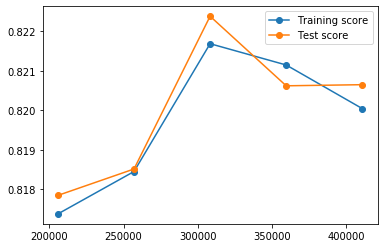

In [0]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

In [0]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(420, activation='relu', input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(420, activation='relu'),
  tf.keras.layers.Dense(210, activation='relu'),
  tf.keras.layers.Dense(3, activation = 'softmax' )
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=15, callbacks=[EarlyStopping(monitor='loss', patience=1)])

Train on 411380 samples
Epoch 1/15
411380/411380 [==============================] - 46s 111us/sample - loss: 0.4145 - accuracy: 0.8215
Epoch 2/15
411380/411380 [==============================] - 46s 111us/sample - loss: 0.4082 - accuracy: 0.8249
Epoch 3/15
411380/411380 [==============================] - 46s 112us/sample - loss: 0.4055 - accuracy: 0.8263
Epoch 4/15
411380/411380 [==============================] - 45s 110us/sample - loss: 0.4039 - accuracy: 0.8266
Epoch 5/15
411380/411380 [==============================] - 45s 110us/sample - loss: 0.4027 - accuracy: 0.8274
Epoch 6/15
411380/411380 [==============================] - 45s 110us/sample - loss: 0.4020 - accuracy: 0.8276
Epoch 7/15
411380/411380 [==============================] - 45s 110us/sample - loss: 0.4012 - accuracy: 0.8279
Epoch 8/15
411380/411380 [==============================] - 45s 110us/sample - loss: 0.4006 - accuracy: 0.8279
Epoch 9/15
411380/411380 [==============================] - 45s 109us/sample - loss: 0.4

In [0]:
len(X_train.keys())

21

# ML Attempt 3:New Data

Remember to Add MD-TVD at the end
- Using the merged Train and Validation sets
- _Fracture`Stages
- _Open`Hole
- My_Well_Types
- Cur_Op_Par_size

In [281]:
df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 31 columns):
EPAssetsId              720804 non-null int64
well_status             720804 non-null object
well_status_code        720804 non-null int64
Province                720804 non-null object
LicenceNumber           720804 non-null object
LicenceDate             720790 non-null datetime64[ns]
WellTypeStandardised    720804 non-null object
SurfAbandonDate         185090 non-null datetime64[ns]
WellNameAmended         720240 non-null object
Formation               720804 non-null object
Field                   720804 non-null object
Pool                    720528 non-null object
TotalDepth              713345 non-null float64
LaheeClass              720804 non-null object
Confidential            720804 non-null object
OSDeposit               683126 non-null object
FinalDrillDate          661778 non-null datetime64[ns]
TVD                     676808 non-null float64
WellProfile        

In [0]:
df_train_processed = df_train.copy()

In [283]:
df_train_processed[df_train_processed['HorizontalLegnth']<0]['HorizontalLegnth'].describe()
#df_train_processed['HorizontalLegnth'].describe().round()

count     225.000000
mean     -199.999822
std       656.724918
min     -4879.000000
25%       -45.000000
50%        -1.580000
75%        -0.200000
max        -0.010000
Name: HorizontalLegnth, dtype: float64

In [284]:
df_train_processed['HorizontalLegnth'] = df_train_processed['HorizontalLegnth'].where(df_train_processed['HorizontalLegnth']>0, 0)
df_train_processed['HorizontalLegnth'].describe()


count    720804.000000
mean        148.853427
std         423.415112
min           0.000000
25%           0.000000
50%           0.000000
75%           2.452500
max       37603.400000
Name: HorizontalLegnth, dtype: float64

In [285]:
TVD_ss = RobustScaler()
df_train_processed['HorizontalLegnth']= TVD_ss.fit_transform(df_train_processed[['HorizontalLegnth']])
df_train_processed['HorizontalLegnth'].describe()


count    720804.000000
mean         60.694567
std         172.646325
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       15332.680938
Name: HorizontalLegnth, dtype: float64

In [286]:
df_train_processed.rename(columns={'''_Max`Prod`(BOE)''':'Max_Prod_BOE','''_Fracture`Stages''':'Frac','''_Completion`Events''':'Completion_Evants'},inplace = True)
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 31 columns):
EPAssetsId              720804 non-null int64
well_status             720804 non-null object
well_status_code        720804 non-null int64
Province                720804 non-null object
LicenceNumber           720804 non-null object
LicenceDate             720790 non-null datetime64[ns]
WellTypeStandardised    720804 non-null object
SurfAbandonDate         185090 non-null datetime64[ns]
WellNameAmended         720240 non-null object
Formation               720804 non-null object
Field                   720804 non-null object
Pool                    720528 non-null object
TotalDepth              713345 non-null float64
LaheeClass              720804 non-null object
Confidential            720804 non-null object
OSDeposit               683126 non-null object
FinalDrillDate          661778 non-null datetime64[ns]
TVD                     676808 non-null float64
WellProfile        

In [0]:
df_train_processed.drop(['EPAssetsId','well_status', 'Province','LicenceNumber','LicenceDate','Confidential',
                         'Formation','Field','TotalDepth', 'OSDeposit','FinalDrillDate',
                         'TVD','PSACAreaName','StatusDate','_Open`Hole','WellNameAmended', 'WellTypeStandardised',
                         'WellProfile','WellSymbPt1','Days_to_StatusDate','LaheeClass'],
                         axis = 1, inplace=True);

In [288]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 10 columns):
well_status_code     720804 non-null int64
SurfAbandonDate      185090 non-null datetime64[ns]
Pool                 720528 non-null object
PSACAreaCode         720804 non-null object
Max_Prod_BOE         227813 non-null float64
Frac                 9315 non-null float64
Completion_Evants    19816 non-null float64
Cur_Op_Par_size      720804 non-null object
My_Well_Types        720804 non-null object
HorizontalLegnth     720804 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 55.0+ MB


In [0]:
# Think about dropping the LaheeClass in favour of My_Well_Types
#df_train_processed['LaheeClass'].unique()

In [290]:
# In the following lines, be careful to code the nul value. Curently, nul values will be replace with something 
#in the process of creating dummies. This may introduce error in the test data prediction.
df_train_processed['Completion_Evants'].where(df_train_processed['Completion_Evants'].isnull(), 1).where(df_train_processed['Completion_Evants'].notnull(), 0).sum()


19816.0

In [0]:
df_train_processed['Completion_Evants'] = df_train_processed['Completion_Evants'].where(df_train_processed['Completion_Evants'].isnull(), 1).where(df_train_processed['Completion_Evants'].notnull(), 0)


In [0]:
df_train_processed['Frac'] = df_train_processed['Frac'].where(df_train_processed['Frac'].isnull(), 1).where(df_train_processed['Frac'].notnull(), 0)


In [0]:
df_train_processed['Max_Prod_BOE'] = df_train_processed['Max_Prod_BOE'].where(df_train_processed['Max_Prod_BOE'].isnull(), 1).where(df_train_processed['Max_Prod_BOE'].notnull(), 0)

In [0]:
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].where(df_train_processed['SurfAbandonDate'].isnull(), 1).where(df_train_processed['SurfAbandonDate'].notnull(), 0)

In [0]:
df_train_processed['Pool'] = df_train_processed['Pool'].where(df_train_processed['Pool']=='Unspecified', 1).where(df_train_processed['Pool']!='Unspecified', 0)

In [0]:
#df_train_processed['LaheeClass'].replace('Development Service Well','Development', inplace=True)
#df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].where(df_train_processed['LaheeClass']!='Development' , 1).where(df_train_processed['LaheeClass']=='Development',0)

In [295]:
# Merge All BC data together
df_train_processed['PSACAreaCode']=df_train_processed['PSACAreaCode'].where((df_train_processed['PSACAreaCode']!='BC0') & 
                                         (df_train_processed['PSACAreaCode']!='BC1') &
                                         (df_train_processed['PSACAreaCode']!='BC2') &
                                         (df_train_processed['PSACAreaCode']!='BC3'), 'BC')
df_train_processed['PSACAreaCode'].unique()

array(['AB2', 'AB4', 'SK1', 'BC', 'SK3', 'AB3', 'AB7', 'AB6', 'AB5',
       'SK2', 'MB', 'AB1'], dtype=object)

In [296]:
df_train_processed['PSACAreaCode'].nunique()

12

In [297]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720804 entries, 0 to 720803
Data columns (total 10 columns):
well_status_code     720804 non-null int64
SurfAbandonDate      720804 non-null object
Pool                 720528 non-null object
PSACAreaCode         720804 non-null object
Max_Prod_BOE         720804 non-null float64
Frac                 720804 non-null float64
Completion_Evants    720804 non-null float64
Cur_Op_Par_size      720804 non-null object
My_Well_Types        720804 non-null object
HorizontalLegnth     720804 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 55.0+ MB


In [298]:
df_train_processed['Frac'].unique()

array([0., 1.])

In [299]:
df_train_processed.dropna(inplace=True)
df_train_processed['well_status_code'] = df_train_processed['well_status_code'].astype('int8')
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].astype('int8')
df_train_processed['Pool'] = df_train_processed['Pool'].astype('category')
df_train_processed['PSACAreaCode'] = df_train_processed['PSACAreaCode'].astype('category')
df_train_processed['Max_Prod_BOE'] = df_train_processed['Max_Prod_BOE'].astype('int8')
df_train_processed['My_Well_Types'] = df_train_processed['My_Well_Types'].astype('category')
df_train_processed['Cur_Op_Par_size'] = df_train_processed['Cur_Op_Par_size'].astype('category')
df_train_processed['Frac'] = df_train_processed['Frac'].astype('int8')
df_train_processed['Completion_Evants'] = df_train_processed['Completion_Evants'].astype('category')

;

''

In [300]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720528 entries, 0 to 720803
Data columns (total 10 columns):
well_status_code     720528 non-null int8
SurfAbandonDate      720528 non-null int8
Pool                 720528 non-null category
PSACAreaCode         720528 non-null category
Max_Prod_BOE         720528 non-null int8
Frac                 720528 non-null int8
Completion_Evants    720528 non-null category
Cur_Op_Par_size      720528 non-null category
My_Well_Types        720528 non-null category
HorizontalLegnth     720528 non-null float64
dtypes: category(5), float64(1), int8(4)
memory usage: 18.3 MB


In [301]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,PSACAreaCode,Max_Prod_BOE,Frac,Completion_Evants,Cur_Op_Par_size,My_Well_Types,HorizontalLegnth
0,2,0,Commingled Pool 017,AB2,0,0,0.0,Large_Co,Gas,0.000000
1,1,0,Lower Grand Rapids,AB4,1,0,0.0,Large_Co,Bitumen,63.702345
2,0,0,Westhazel General Petroleum,SK1,0,0,0.0,Large_Co,Oil,0.000000
3,0,0,Upper Mannville A,AB4,0,0,0.0,Large_Co,Oil,0.000000
4,2,0,Unspecified,BC,0,0,0.0,Small_Co,Unspecified,0.000000


In [0]:
df_train_processed = pd.get_dummies(df_train_processed, drop_first=True)
df_train_processed.info()

In [0]:
df_train_processed.head()

In [0]:
df_train_processed['well_status_code'].unique()

## Establish New baseline


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_processed.drop('well_status_code', axis=1), df_train_processed['well_status_code'], test_size=0.3)

In [267]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504562 entries, 709969 to 334571
Data columns (total 38 columns):
SurfAbandonDate                     504562 non-null int8
Pool                                504562 non-null int8
Max_Prod_BOE                        504562 non-null int8
Frac                                504562 non-null int8
HorizontalLegnth                    504562 non-null float64
PSACAreaCode_AB2                    504562 non-null uint8
PSACAreaCode_AB3                    504562 non-null uint8
PSACAreaCode_AB4                    504562 non-null uint8
PSACAreaCode_AB5                    504562 non-null uint8
PSACAreaCode_AB6                    504562 non-null uint8
PSACAreaCode_AB7                    504562 non-null uint8
PSACAreaCode_BC                     504562 non-null uint8
PSACAreaCode_MB                     504562 non-null uint8
PSACAreaCode_SK1                    504562 non-null uint8
PSACAreaCode_SK2                    504562 non-null uint8
PSACAreaCode_SK3

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(780, activation='relu', input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(780, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(39, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(3, activation = 'softmax' )
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [280]:
model.fit(X_train, y_train, epochs=30, batch_size = 512, 
          validation_split = 0.2,
          callbacks=[EarlyStopping(monitor='loss',
                                   patience=1)])



Train on 403649 samples, validate on 100913 samples
Epoch 1/30
403649/403649 [==============================] - 7s 16us/sample - loss: 0.5294 - accuracy: 0.7945 - val_loss: 0.4193 - val_accuracy: 0.8255
Epoch 2/30
403649/403649 [==============================] - 6s 16us/sample - loss: 0.4283 - accuracy: 0.8276 - val_loss: 0.4012 - val_accuracy: 0.8362
Epoch 3/30
403649/403649 [==============================] - 6s 16us/sample - loss: 0.4123 - accuracy: 0.8321 - val_loss: 0.3886 - val_accuracy: 0.8360
Epoch 4/30
403649/403649 [==============================] - 6s 16us/sample - loss: 0.4050 - accuracy: 0.8339 - val_loss: 0.3865 - val_accuracy: 0.8375
Epoch 5/30
403649/403649 [==============================] - 6s 16us/sample - loss: 0.4005 - accuracy: 0.8357 - val_loss: 0.3804 - val_accuracy: 0.8386
Epoch 6/30
403649/403649 [==============================] - 6s 15us/sample - loss: 0.3969 - accuracy: 0.8361 - val_loss: 0.3829 - val_accuracy: 0.8359
Epoch 7/30
403649/403649 [================

In [270]:
model.evaluate(X_test,  y_test, verbose=2)

216242/216242 - 13s - loss: 0.3710 - accuracy: 0.8433


[0.37095230420902764, 0.8433283]

In [271]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)

In [273]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     91919
           1       0.87      0.91      0.89     85490
           2       0.65      0.54      0.59     38833

    accuracy                           0.84    216242
   macro avg       0.80      0.78      0.79    216242
weighted avg       0.83      0.84      0.83    216242



In [0]:
from time import time
from sklearn import cross_validation

class Stacker:

    def __init__(self, penalty, n_folds, verbose=True, random_state=1):
        self._penalty = penalty
        self._n_folds = n_folds
        self._verbose = verbose
        self._random_state = random_state

    def Run(self, X, y, model, predict_method):
        kf = cross_validation.KFold(
            y.shape[0], n_folds=self._n_folds, shuffle=True, random_state=self._random_state)
        trscores, cvscores, times = [], [], []
        i = 0
        stack_train = np.zeros(len(y))  # stacked predictions
        for i, (train_fold, validation_fold) in enumerate(kf):
            i = i + 1
            t = time()
            model.fit(X.iloc[train_fold], y.iloc[train_fold])

            tr_pred = predict_method(model, X.iloc[train_fold])

            trscore = self._penalty(y.iloc[train_fold], tr_pred)

            validation_prediction = predict_method(
                model, X.iloc[validation_fold])
            cvscore = self._penalty(
                y.iloc[validation_fold], validation_prediction)

            trscores.append(trscore)
            cvscores.append(cvscore)
            times.append(time() - t)

            stack_train[validation_fold] = validation_prediction

        if self._verbose:
            print("TRAIN %.5f | TEST %.5f | TEST-STD %5f | TIME %.2fm (1-fold)" %
                  (np.mean(trscores), np.mean(cvscores), np.std(cvscores), np.mean(times) / 60))
            print(model.get_params(deep=True))
            print("\n")

        return np.mean(cvscores), stack_train